### Project Name - Retail Analysis
#### Group Members:
##### Joshi Abraham
##### Jubil Gea Joy
##### Monjima Kundu
##### NirmalKumar Ravikumar 
##### Tejas Shirke

# Dataset Context

This is a Brazilian ecommerce public dataset of orders made at Olist, the largest department store in Brazilian marketplaces. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

### DataSets Used 

#### olist_customers_dataset.csv --> Dataset that provides details about customers
#### olist_order_items_dataset.csv --> Dataset that provides details about ordered items
#### olist_order_payments_dataset.csv --> Dataset that provides details about payments
#### olist_order_reviews_dataset.csv --> Dataset that provides details about review of products
#### olist_orders_dataset.csv --> Dataset that provides details about orders
#### olist_products_dataset.csv --> Dataset that provides details about products
#### olist_sellers_dataset.csv --> Dataset that provides details about sellers
#### product_category_name_translation.csv --> Dataset that provides details about product category

### Data Description

* 'order_approved_at' - The column that gives the date and time at which the order is approved
* 'order_delivered_carrier_date' - The column that gives the date and time at which the order had reached the carrier or    delivery agent
* 'order_delivered_customer_date' - The column that gives the date and time at which the order had reached the customer
* 'shipping_limit_date' - The deadline date for the seller to deliver the goods to the customers.
* 'order_estimated_delivery_date'- Estimated delivery date of the product to the customer.
* 'freight_value'：It is the delivery fee.

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

plt.rcParams['figure.figsize']=[15,8]

from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

### Reading dataset

In [2]:
# Reading data set

df = pd.read_csv("Merged.csv")
df.head()

,Unnamed: 0,product_id,product_category_name,product_category_name_english,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,...,order_item_id,seller_id,shipping_limit_date,price,freight_value,payment_value,review_score,seller_zip_code_prefix,seller_city,seller_state
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery,f8a3e963a310aa58b60a5b1fed5bceb5,b1a1199364a4a7fe27c4486ab63f550d,13848,mogi-guacu,SP,e17e4f88e31525f7deef66779844ddce,...,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,18.30,5,3694,sao paulo,SP
1,1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,perfumery,c15eed3881abc9e06763c989679c5094,48d6d950c0aba132537fc335c0c56e01,5893,sao paulo,SP,5fa78e91b5cb84b6a8ccc42733f95742,...,1,7040e82f899a04d1b434b795a43b4617,2017-12-14 16:33:14,16.90,7.78,24.68,2,1026,sao paulo,SP
2,2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,perfumery,12a2c614dfc8926e793516b1638c7471,7139ee1d2ad919a82b6e68a29582264e,6519,santana de parnaiba,SP,048cc42e03ca8d43c729adf6962cb348,...,1,7040e82f899a04d1b434b795a43b4617,2017-11-23 21:31:31,16.90,7.78,24.68,5,1026,sao paulo,SP
3,3,0d009643171aee696f4733340bc2fdd0,perfumaria,perfumery,6d699e3ab0fd90fffb3d1379d937de77,0b3dc7efaafb0cf78a4796d42fa8d74c,22410,rio de janeiro,RJ,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,...,1,fe2032dab1a61af8794248c8196565c9,2017-08-03 09:50:14,339.00,17.13,356.13,5,13030,campinas,SP
4,4,0d009643171aee696f4733340bc2fdd0,perfumaria,perfumery,38248f5e3248ffe52b20c510522b04f5,376c9c37aea85ca26315dfe54b3e4c93,9930,diadema,SP,b034b38968b7bc21648e36e05d2eb09f,...,1,fe2032dab1a61af8794248c8196565c9,2017-08-31 16:25:17,339.00,11.19,350.19,4,13030,campinas,SP


## Dropping Unnecessary columns:

In [3]:

# We're dropping the "product_category_name" column be cause it's a duplicate column in another language and we have the same in english

df.drop(columns =['order_purchase_timestamp','seller_zip_code_prefix','customer_zip_code_prefix','product_category_name'],axis=1,inplace=True)

### Data Cleaning

In [4]:
df.columns

Index(['Unnamed: 0', 'product_id', 'product_category_name_english',
       'customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_value',
       'review_score', 'seller_city', 'seller_state'],
      dtype='object')

In [5]:
df.shape

(115609, 22)

In [6]:
# descriptive statistic parameters for the datase
df.describe()

,Unnamed: 0,order_item_id,price,freight_value,payment_value,review_score
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000
mean,57804.000000,1.194535,120.619850,20.056880,172.387379,4.034409
std,33373.587973,0.685926,182.653476,15.836184,265.873969,1.385584
min,0.000000,1.000000,0.850000,0.000000,0.000000,1.000000
25%,28902.000000,1.000000,39.900000,13.080000,60.870000,4.000000
50%,57804.000000,1.000000,74.900000,16.320000,108.050000,5.000000
75%,86706.000000,1.000000,134.900000,21.210000,189.480000,5.000000
max,115608.000000,21.000000,6735.000000,409.680000,13664.080000,5.000000


In [7]:
df.describe(include='all')

,Unnamed: 0,product_id,product_category_name_english,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_approved_at,...,order_estimated_delivery_date,order_item_id,seller_id,shipping_limit_date,price,freight_value,payment_value,review_score,seller_city,seller_state
count,115609.000000,115609,115609,115609,115609,115609,115609,115609,115609,115595,...,115609,115609.000000,115609,115609,115609.000000,115609.000000,115609.000000,115609.000000,115609,115609
unique,NaN,32171,71,96516,93396,4093,27,96516,7,88332,...,449,NaN,3028,91386,NaN,NaN,NaN,NaN,604,23
top,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,bed_bath_table,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:43:31,...,2017-12-20 00:00:00,NaN,4a3ca9315b744ce9f8e9374361493884,2017-08-14 20:43:31,NaN,NaN,NaN,NaN,sao paulo,SP
freq,NaN,533,11847,63,75,18267,48797,63,113210,63,...,649,NaN,2128,63,NaN,NaN,NaN,NaN,28811,82417
mean,57804.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.194535,NaN,NaN,120.619850,20.056880,172.387379,4.034409,NaN,NaN
std,33373.587973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.685926,NaN,NaN,182.653476,15.836184,265.873969,1.385584,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000,NaN,NaN,0.850000,0.000000,0.000000,1.000000,NaN,NaN
25%,28902.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000,NaN,NaN,39.900000,13.080000,60.870000,4.000000,NaN,NaN
50%,57804.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000,NaN,NaN,74.900000,16.320000,108.050000,5.000000,NaN,NaN
75%,86706.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000,NaN,NaN,134.900000,21.210000,189.480000,5.000000,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     115609 non-null  int64  
 1   product_id                     115609 non-null  object 
 2   product_category_name_english  115609 non-null  object 
 3   customer_id                    115609 non-null  object 
 4   customer_unique_id             115609 non-null  object 
 5   customer_city                  115609 non-null  object 
 6   customer_state                 115609 non-null  object 
 7   order_id                       115609 non-null  object 
 8   order_status                   115609 non-null  object 
 9   order_approved_at              115595 non-null  object 
 10  order_delivered_carrier_date   114414 non-null  object 
 11  order_delivered_customer_date  113209 non-null  object 
 12  order_estimated_delivery_date 

In [9]:
#Count of products by category which are purchased more 
grouped_pid=df.groupby(['product_category_name_english']).count()[['product_id']] 
grouped_pid[grouped_pid['product_id'] > 1].sort_values ('product_id',ascending=False)

,product_id
product_category_name_english,
bed_bath_table,11847
health_beauty,9944
sports_leisure,8942
furniture_decor,8743
computers_accessories,8105
...,...
arts_and_craftmanship,24
la_cuisine,15
cds_dvds_musicals,14


In [10]:
#Top 5 products purchased maximum number of times
grouped_pid[grouped_pid['product_id'] > 1].sort_values ('product_id',ascending=False).head(5)

,product_id
product_category_name_english,
bed_bath_table,11847
health_beauty,9944
sports_leisure,8942
furniture_decor,8743
computers_accessories,8105


**Inference:**
* More popular : bed_bath_table , health_beauty, sports_leisure , furniture_decor and computers_accessories.
* Least popular : security_services, fashion_children_clothes , cds_dvds_musicals , la_cuisine and arts_and_craftsmanship.

In [11]:
#Customers who have purchased a particular product multiple times
grouped_cid=df.groupby(['customer_id','product_category_name_english']).count()[['product_id']]
grouped_cid[grouped_cid['product_id'] > 1].sort_values ('product_id',ascending=False).head(10)

,,product_id
customer_id,product_category_name_english,
270c23a11d024a44c896d1894b261a83,bed_bath_table,42
13aa59158da63ba0e93ec6ac2c07aacb,office_furniture,38
9af2372a1e49340278e7c1ef8d749f34,garden_tools,29
92cd3ec6e2d643d4ebd0e3d6238f69e2,bed_bath_table,26
2ba91e12e5e4c9f56b82b86d9031d329,perfumery,24
d22f25a9fadfb1abbc2e29395b1239f4,computers_accessories,24
63b964e79dee32a3587651701a2b8dbf,agro_industry_and_commerce,24
6ee2f17e3b6c33d6a9557f280edd2925,garden_tools,24
be1c4e52bb71e0c54b11a26b8e8d59f2,bed_bath_table,22


**Inference :**
* These customers are purchasing a particular product multiple times and we can say that they are satisfied with the product. 

In [12]:
#  Top 5 states with more freight_value 
df.groupby('customer_state').mean()[['freight_value']].sort_values('freight_value',ascending=False).head(5)


,freight_value
customer_state,
RR,43.587000
PB,43.436850
RO,41.077849
AC,40.232473
TO,40.007778


**Inference :**
* Customer state RR , PB, RO, AC and TO have the highest freight value.

In [13]:
#Top 5 Customers and their cities who have purchased multiple times
grouped_cid=df.groupby(['customer_id','customer_city']).count()[['product_id']]
grouped_cid[grouped_cid['product_id'] > 1].sort_values ('product_id',ascending=False).head(5)

,,product_id
customer_id,customer_city,
270c23a11d024a44c896d1894b261a83,sao paulo,63
13aa59158da63ba0e93ec6ac2c07aacb,rio de janeiro,38
9af2372a1e49340278e7c1ef8d749f34,cuiaba,29
92cd3ec6e2d643d4ebd0e3d6238f69e2,sao paulo,26
2ba91e12e5e4c9f56b82b86d9031d329,suzano,24


**Inference:**
* These are the customers and the cities who have purchased multiple times.
* We can see that these are the top 5 purchasers are notably 2 are from Sao Paulo.

In [14]:
#Top 5 Customers who have paid maximum

grouped_cid=df.groupby(['customer_id','product_category_name_english','price']).count()[['product_id']] 
grouped_cid.sort_values ('price',ascending=False).head(5)

,,,product_id
customer_id,product_category_name_english,price,
c6e2731c5b391845f6800c97401a43a9,housewares,6735.0,1
3fd6777bbce08a352fddd04e4a7cc8f6,art,6499.0,1
df55c14d1476a9a3467f131269c2477f,small_appliances,4799.0,1
24bbf5fd2f2e1b359ee7de94defc4a15,small_appliances,4690.0,1
3d979689f636322c62418b6346b1c6d2,computers,4590.0,1


**Inference:**
* Determined top 5 customers who have paid highest amount.
* Notably, 2 are of small_appliance category
* Here Product_id refers to the count of the product.

In [15]:
# Finding out the difference between order approved date and date of order delivered to customer . 
#And storing the number of days in a new column called 'date_difference'.

In [16]:
df[['order_delivered_customer_date','order_approved_at']] = df[['order_delivered_customer_date','order_approved_at']].apply(pd.to_datetime) 
df['date_difference'] = abs((df['order_delivered_customer_date'] - df['order_approved_at'])).dt.days
df[['date_difference']].head()

,date_difference
0,2.0
1,5.0
2,5.0
3,11.0
4,3.0


In [17]:
# Mean time to deliver the product
df['date_difference'].mean()

11.52173682583153

<AxesSubplot:xlabel='date_difference', ylabel='Density'>

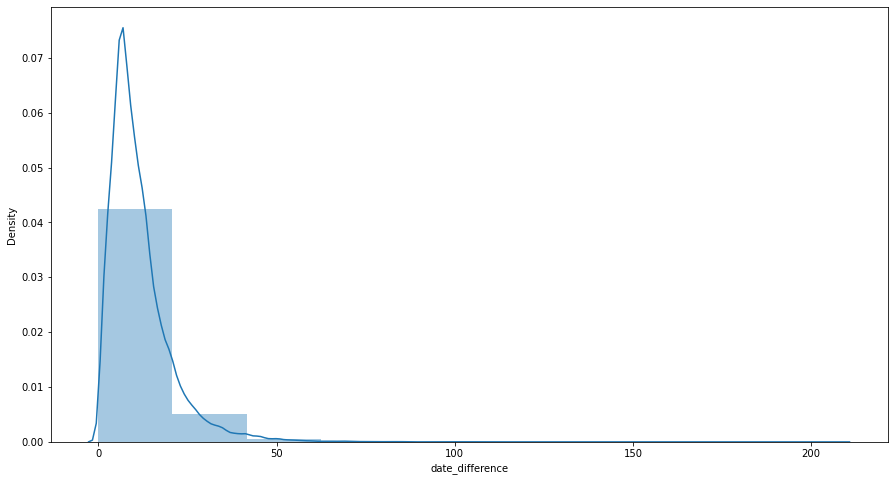

In [18]:
sns.distplot(df['date_difference'],bins=10,)

In [19]:
df['date_difference'].skew()

3.8392624194622753

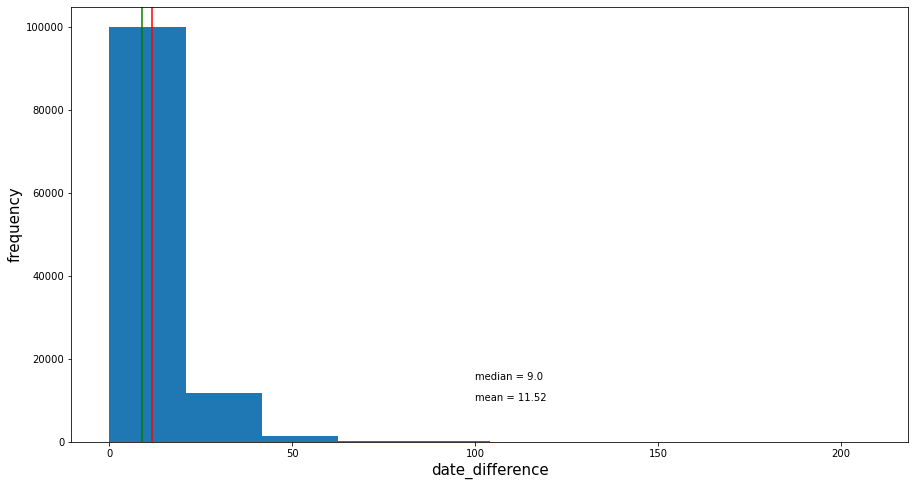

In [20]:
plt.figure(figsize = (15,8))
plt.hist(df["date_difference"])
plt.axvline(df["date_difference"].mean(), color="red")
plt.axvline(df["date_difference"].median(),color="Green")
plt.text(x=100, y= 10000, s= "mean = " + str(round(df["date_difference"].mean(),2)))
plt.text(x=100, y= 15000, s= "median = " + str(round(df["date_difference"].median(),2)))
plt.xlabel("date_difference",fontsize = 15)
plt.ylabel("frequency", fontsize = 15)
plt.show()

**Inference :**
* On average it takes around 11 days to deliver the product.Most of the data lies between 0 - 25 days.
* Mostly the order gets delivered within 9 days from the order approved date.
* It is right skewed and its value is 3.83.

In [21]:
#maximum time to deliver the product 
df[['order_delivered_customer_date','order_approved_at','date_difference','customer_state','seller_state','product_category_name_english']].sort_values(by='date_difference',ascending=False).head(50)

,order_delivered_customer_date,order_approved_at,date_difference,customer_state,seller_state,product_category_name_english
26955,2018-09-19 23:24:07,2018-02-23 15:16:14,208.0,RJ,SP,cool_stuff
99155,2017-09-19 14:38:21,2017-03-09 13:26:57,194.0,PI,SP,watches_gifts
23471,2017-09-19 14:00:04,2017-03-08 22:47:40,194.0,SE,MG,musical_instruments
78139,2017-09-19 14:33:17,2017-03-08 18:09:02,194.0,PI,SP,office_furniture
108347,2017-09-19 15:12:50,2017-03-09 01:11:33,194.0,PA,MG,consoles_games
97071,2018-07-13 20:51:31,2018-01-03 10:31:15,191.0,SP,SP,home_construction
35549,2017-09-19 17:00:07,2017-03-13 20:17:10,189.0,SP,RS,furniture_decor
80899,2017-09-19 14:38:18,2017-03-15 11:24:27,188.0,SE,SP,auto
29609,2017-09-19 16:28:58,2017-03-16 11:36:00,187.0,AP,SP,furniture_decor
35611,2017-09-19 16:28:58,2017-03-16 11:36:00,187.0,AP,SP,furniture_decor


**Inference :**
* The maximum date difference between order approved and order delivered is 208 days

## Univariate , Bivariate & Multivariate Analysis

#### Univariate Analysis

<AxesSubplot:>

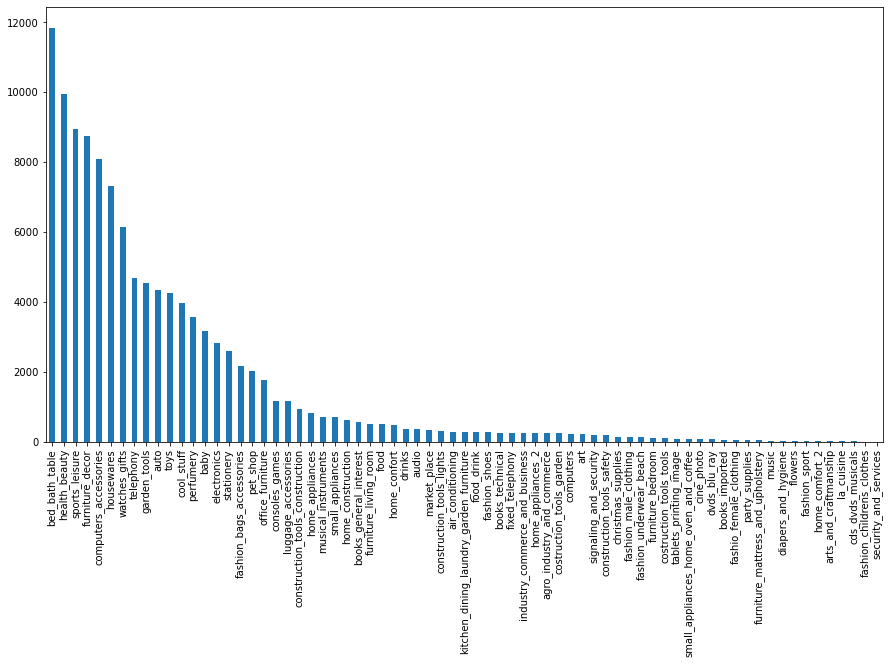

In [22]:

plt.figure(figsize=(15,8))
df['product_category_name_english'].value_counts().plot(kind='bar')


**Inference:**
* From the above barchart we can conclude that following products are more and least popular.
* More popular : bed_bath_table , health_beauty, sports_leisure , furniture_decor and computers_accessories.
* Least popular : security_services, fashion_children_clothes , cds_dvds_musicals , la_cuisine and arts_and_craftsmanship.

<AxesSubplot:>

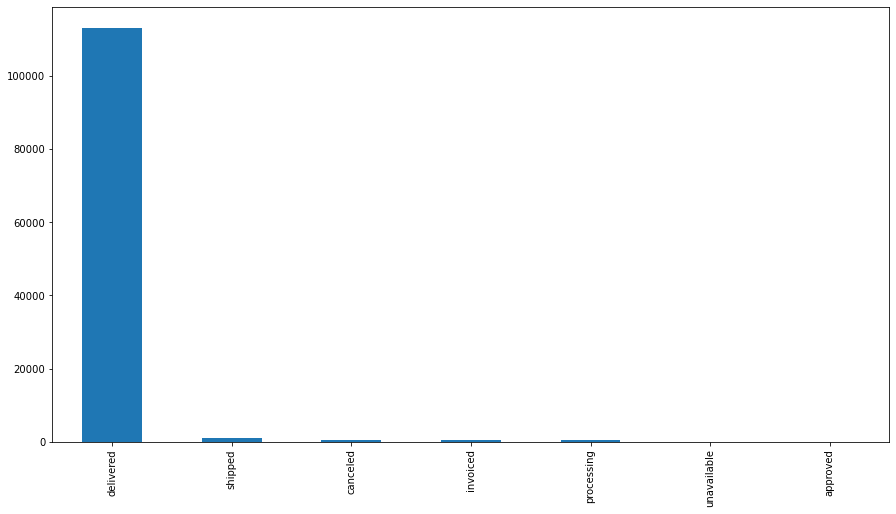

In [23]:
plt.figure(figsize=(15,8))
df['order_status'].value_counts().plot(kind='bar')

**Inference:** 

* We can conclude that almost all the products are delivered. 
* Some are in shipments, approved, cancelled, invoiced,processing and unavailable state.  

### Multivariate Analysis

<Figure size 1080x576 with 0 Axes>

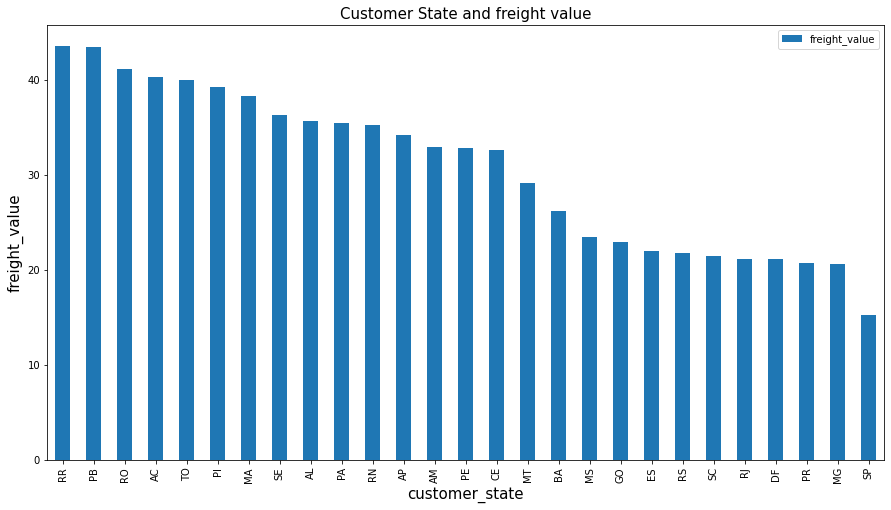

In [24]:
# Checking lowest and highest freight value based on customer state.
plt.figure(figsize = (15,8))
df_freight=df.groupby('customer_state').mean()[['freight_value']].sort_values('freight_value',ascending=False).plot.bar()
plt.xlabel("customer_state", fontsize = 15)
plt.ylabel("freight_value", fontsize = 15)
plt.title("Customer State and freight value", fontsize = 15)
plt.show()


**Inference:**
* Freight value is heighest for Customer states like RR and PB .
* Customer states SP has the lowest freight value

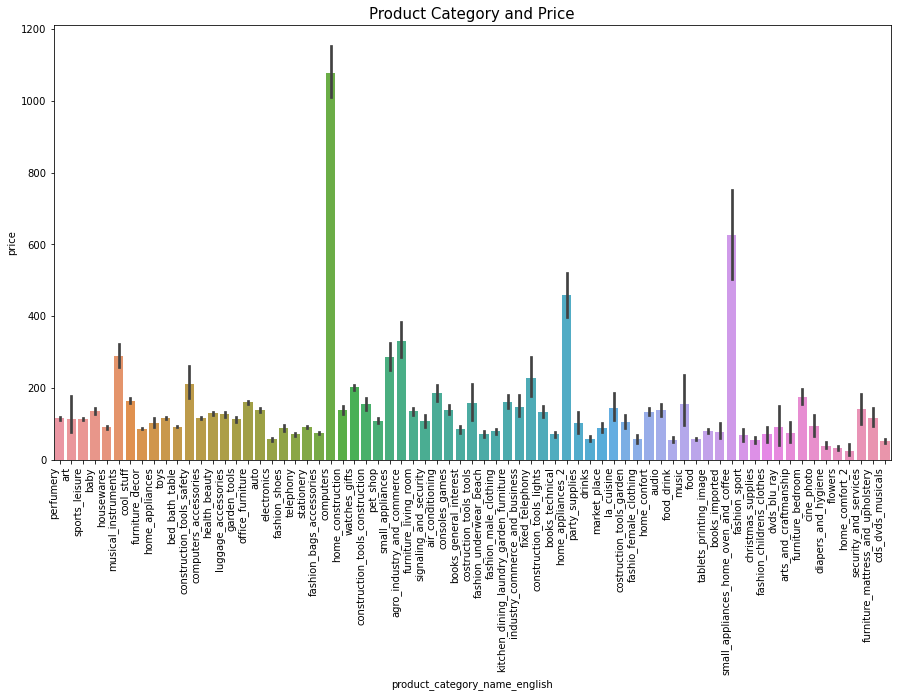

In [25]:
# Finding out the product category with highest and lowest price
plt.figure(figsize = (15,8))
plot_price=sns.barplot(x='product_category_name_english',y='price',data=df)
plt.draw()
plot_price.set_xticklabels(labels=plot_price.get_xticklabels(), rotation=90, ha="right")
plt.title("Product Category and Price", fontsize = 15)
plt.show()


**Inference: **
* The products in the category name Computers has the highest price and products in the category name home comfort 2 has the lowest price

In [26]:
# freight value between Seller State and Customer State

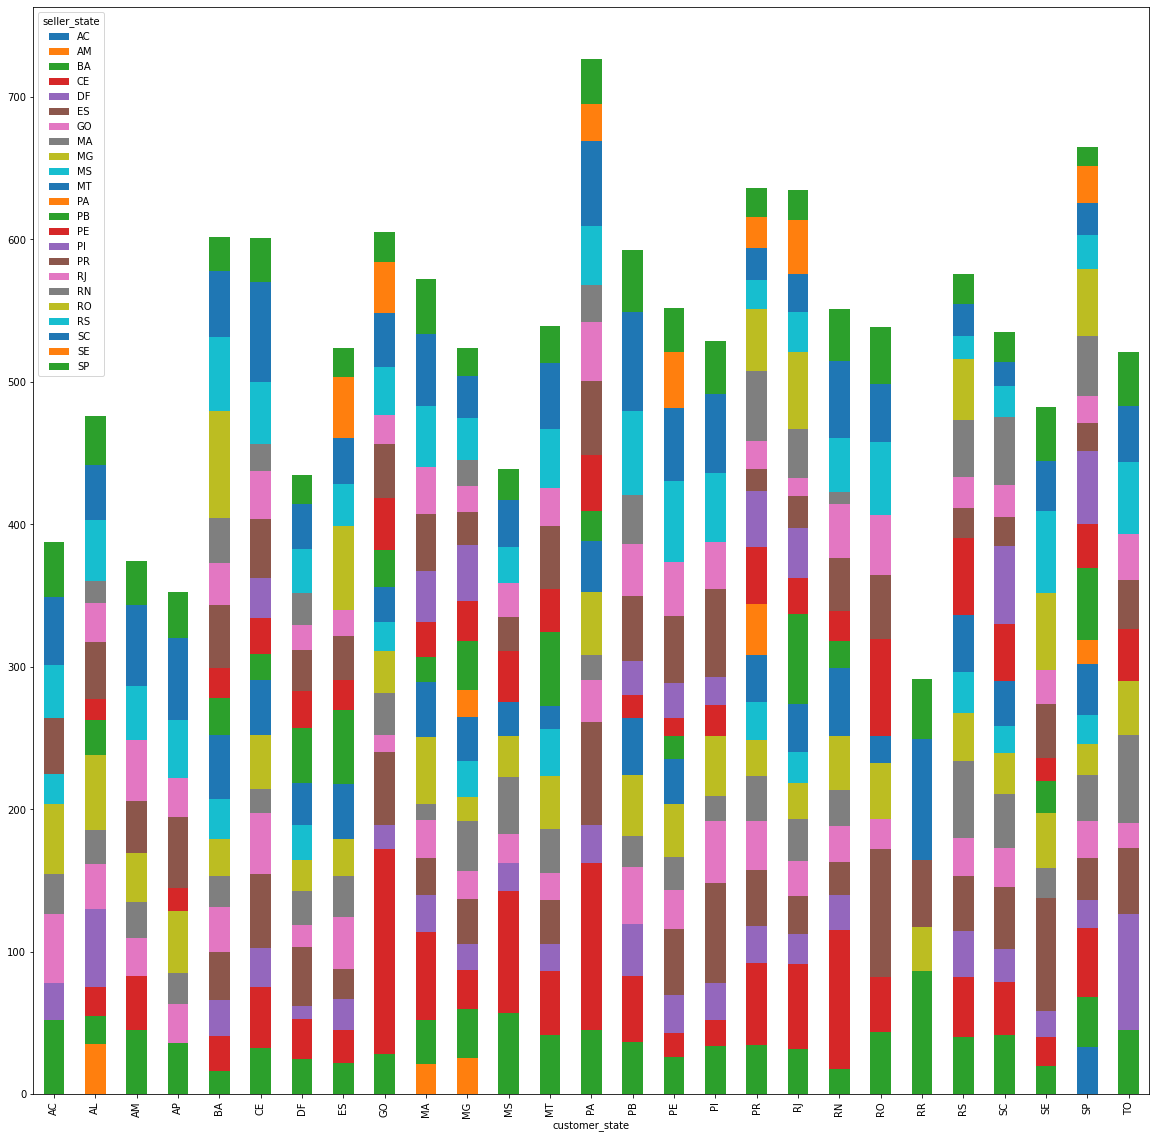

In [27]:
pivot= pd.pivot_table(df,index = 'customer_state', columns = 'seller_state',values = 'freight_value',aggfunc= 'mean')
pivot
barplot=pivot.plot.bar(stacked =True,figsize = (20,20))
plt.show()

<AxesSubplot:xlabel='seller_state', ylabel='freight_value'>

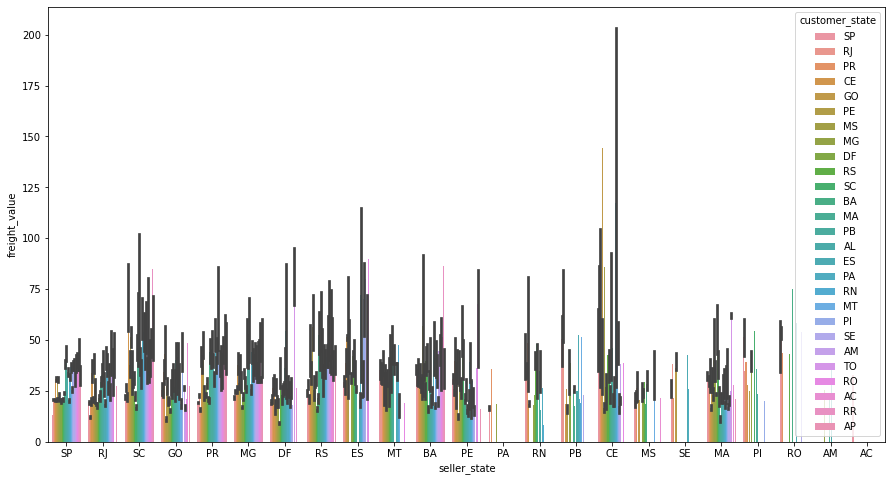

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(x='seller_state',y='freight_value',hue='customer_state',data=df)

**Inference: **

* We tried to establish that sellers and customers originate from the same state and thereby the lower freight charge in the SP state but the graph could not establish the correct correlation

<AxesSubplot:ylabel='product_category_name_english'>

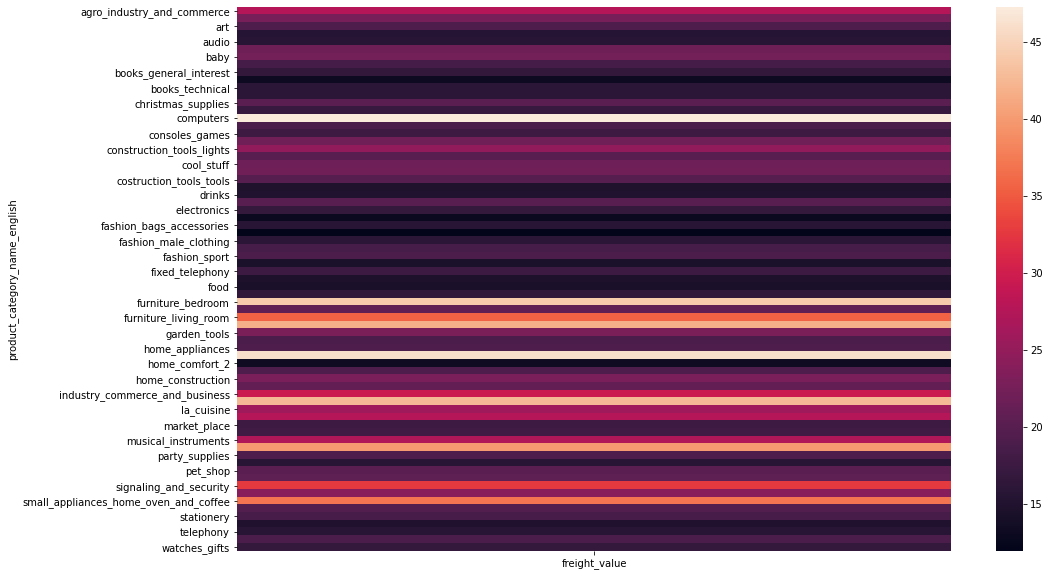

In [29]:
#  the most transportation cost (freight value) among the  Product categories
plt.figure(figsize = (16,10))
sns.heatmap(df.pivot_table(index=['product_category_name_english'],values=['freight_value'],aggfunc='mean'))

**Inference:**
* Home construction has the heighest freight value. Lowest transportation cost is on watches gifts , stationery .

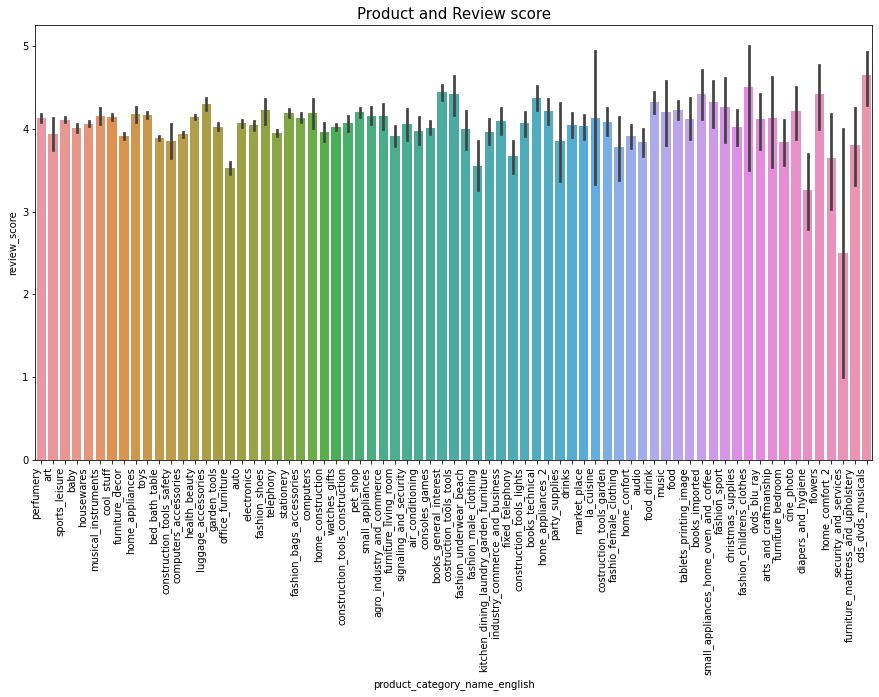

In [30]:
# Product and review score
plt.figure(figsize = (15,8))
plot_review=sns.barplot(x='product_category_name_english',y='review_score',data=df)
plt.draw()
plot_review.set_xticklabels(labels=plot_review.get_xticklabels(), rotation=90, ha="right")
plt.title("Product and Review score", fontsize = 15)
plt.show()


**Inference:**
* cds_dvds_musicals has the highest review score .
* Flowers and securityandservices have the least review score  . 
* Almost all the products has review score > 3.5

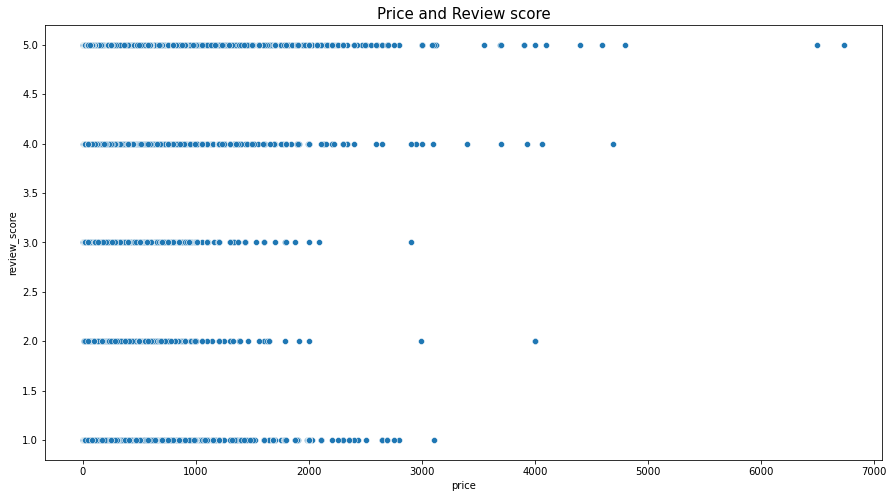

In [31]:
#Relationship between price and review score
plt.figure(figsize = (15,8))
plot_review=sns.scatterplot(x='price',y='review_score',data=df)
plt.title("Price and Review score", fontsize = 15)
plt.show()

**Inference:**
* The price does not have any effect on review score.

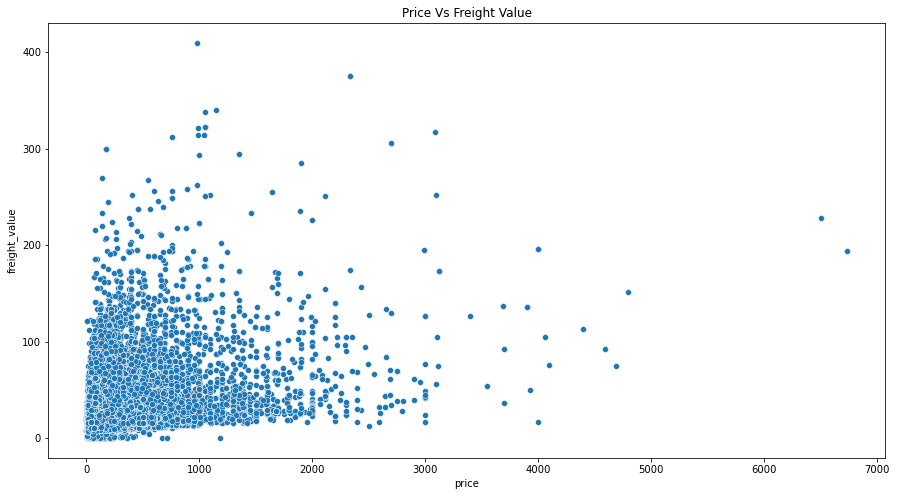

In [32]:
# Relationship between price and freight value
plt.figure(figsize = (15,8))
sns.scatterplot(x ='price',y='freight_value',data=df)
plt.title('Price Vs Freight Value')
plt.show()

**Inference:**
* There is no significance difference between Freight value and price

In [33]:
df.corr()

,Unnamed: 0,order_item_id,price,freight_value,payment_value,review_score,date_difference
Unnamed: 0,1.000000,-0.013401,0.057530,0.011215,0.051989,-0.000018,0.017303
order_item_id,-0.013401,1.000000,-0.060985,-0.030591,0.256610,-0.128691,-0.021507
price,0.057530,-0.060985,1.000000,0.414640,0.740246,-0.005057,0.059731
freight_value,0.011215,-0.030591,0.414640,1.000000,0.373991,-0.038282,0.211461
payment_value,0.051989,0.256610,0.740246,0.373991,1.000000,-0.082848,0.055053
review_score,-0.000018,-0.128691,-0.005057,-0.038282,-0.082848,1.000000,-0.302780
date_difference,0.017303,-0.021507,0.059731,0.211461,0.055053,-0.302780,1.000000


<AxesSubplot:>

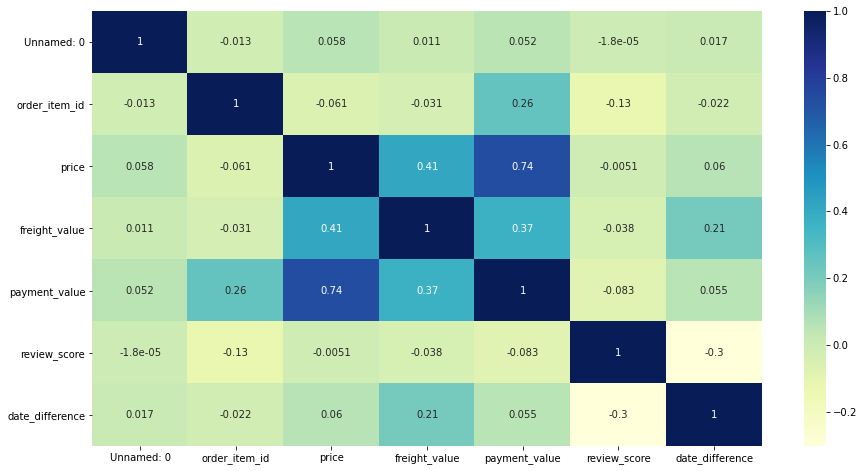

In [34]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

**Inference:**
* Price and payment value are highly correlated

<Figure size 1080x576 with 0 Axes>

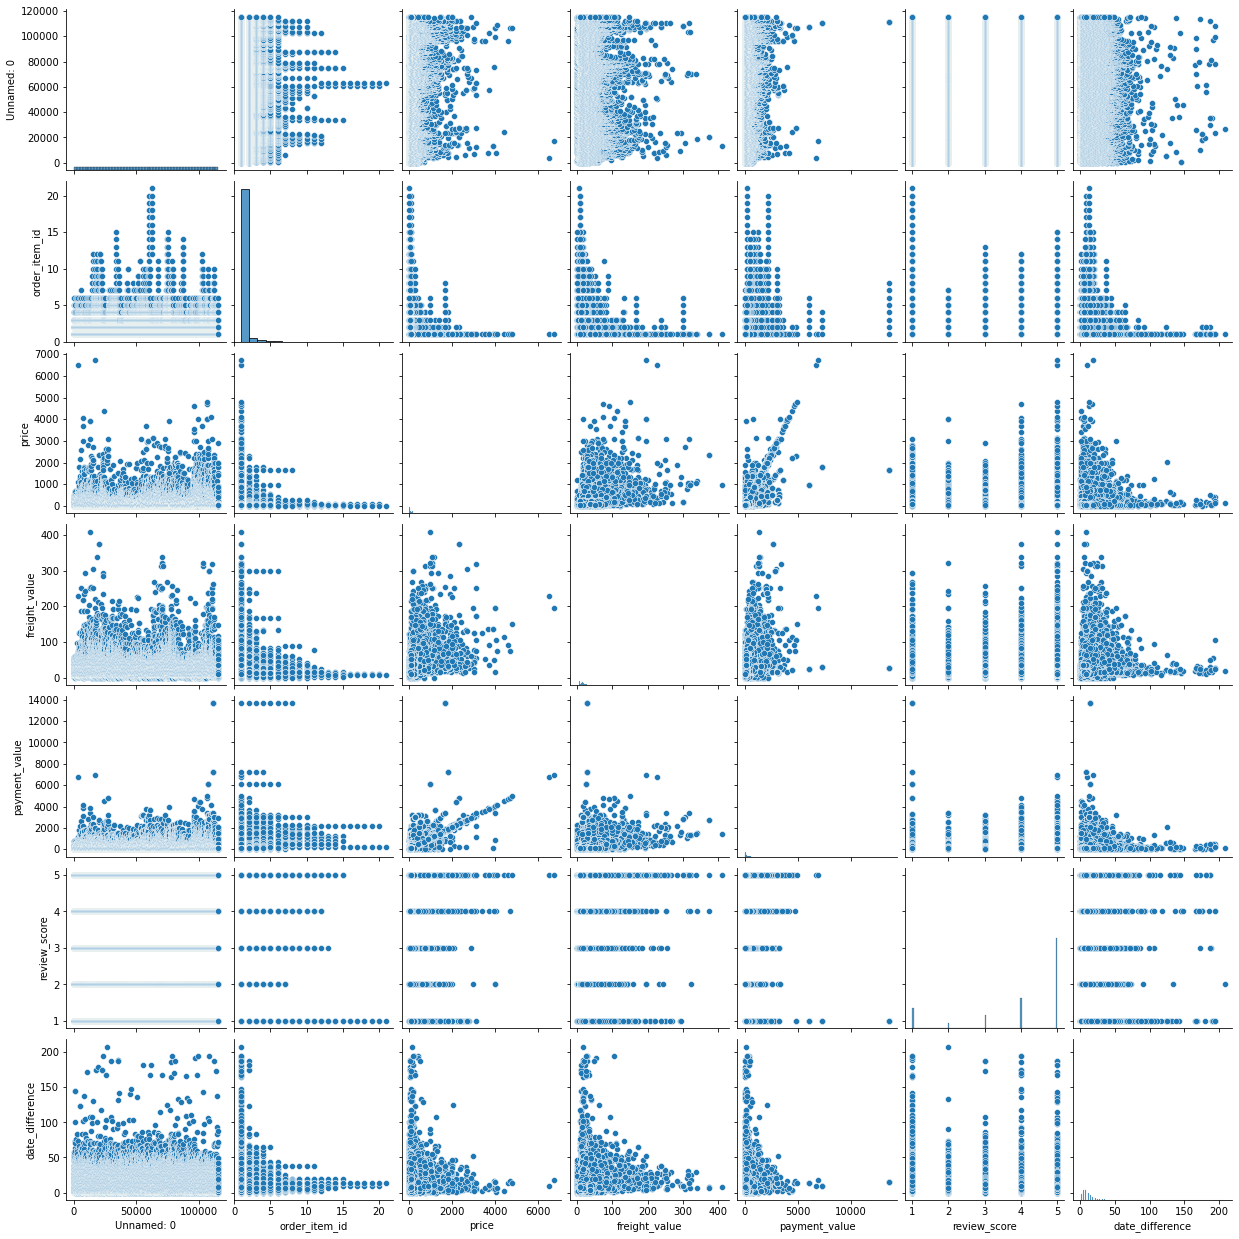

In [35]:
#MULTIVARIATE ANALYSIS 
plt.figure(figsize=(15,8))
sns.pairplot(df)

**Inference:**
* There is a significant difference between price and payment value . It has a positive correlation of 0.74.
* There is no significant difference between Freight value and price.

#### DATA PROCESSING AND CLEANING

In [36]:
# Missing value imputation
df.isnull().sum()

Unnamed: 0                          0
product_id                          0
product_category_name_english       0
customer_id                         0
customer_unique_id                  0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_approved_at                  14
order_delivered_carrier_date     1195
order_delivered_customer_date    2400
order_estimated_delivery_date       0
order_item_id                       0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_value                       0
review_score                        0
seller_city                         0
seller_state                        0
date_difference                  2414
dtype: int64

In [37]:
df.isnull().sum()/len(df)*100

Unnamed: 0                       0.000000
product_id                       0.000000
product_category_name_english    0.000000
customer_id                      0.000000
customer_unique_id               0.000000
customer_city                    0.000000
customer_state                   0.000000
order_id                         0.000000
order_status                     0.000000
order_approved_at                0.012110
order_delivered_carrier_date     1.033657
order_delivered_customer_date    2.075963
order_estimated_delivery_date    0.000000
order_item_id                    0.000000
seller_id                        0.000000
shipping_limit_date              0.000000
price                            0.000000
freight_value                    0.000000
payment_value                    0.000000
review_score                     0.000000
seller_city                      0.000000
seller_state                     0.000000
date_difference                  2.088073
dtype: float64

**Outlier Treatment:**
* The columns order_delivered_carrier_date, order_delivered_customer_date, order_approved_at 
* These columns have very small null values and for analysis purpose we do not require these rows . Also they not affect on the data analysis so we are dropping it. 

In [38]:
#1.Removing the null values in order_delivered_carrier_date
df_na = df['order_delivered_carrier_date'].isnull()
df_na.index

RangeIndex(start=0, stop=115609, step=1)

In [39]:
df_na = df['order_delivered_carrier_date'].isnull()
df_na.index[df_na==True].tolist()

[13,
 231,
 234,
 235,
 236,
 301,
 332,
 531,
 534,
 540,
 552,
 628,
 637,
 906,
 961,
 1073,
 1689,
 2012,
 2013,
 2183,
 2334,
 2389,
 2544,
 2551,
 2819,
 2916,
 2976,
 3280,
 3359,
 3361,
 3362,
 3486,
 3488,
 3489,
 3502,
 3503,
 3530,
 3729,
 3730,
 3731,
 3732,
 3733,
 3734,
 3760,
 3779,
 3839,
 3840,
 4076,
 4151,
 4152,
 4302,
 4416,
 4417,
 4423,
 4595,
 4765,
 4775,
 4776,
 4824,
 5148,
 5149,
 5472,
 5606,
 5607,
 5632,
 5731,
 5786,
 5855,
 6089,
 6096,
 6177,
 6178,
 6366,
 6367,
 6420,
 6421,
 6434,
 6441,
 6460,
 6490,
 6560,
 6906,
 6998,
 7055,
 7123,
 7564,
 7682,
 7693,
 7694,
 7698,
 7855,
 7942,
 7943,
 7980,
 7992,
 8403,
 8437,
 8493,
 8494,
 8535,
 8588,
 8671,
 8711,
 8742,
 9039,
 9204,
 9317,
 9322,
 9470,
 9513,
 9514,
 9589,
 9600,
 9601,
 9779,
 9847,
 9893,
 10044,
 10045,
 10055,
 10069,
 10245,
 10246,
 10301,
 10302,
 10507,
 10894,
 10981,
 11045,
 11111,
 11286,
 11502,
 11563,
 11571,
 11579,
 11608,
 11685,
 11686,
 11688,
 11865,
 12155,
 1215

In [40]:
#Dropping the null value row
df = df.drop(df_na.index[df_na==True].tolist())

In [41]:
#No null values are present 
df['order_delivered_carrier_date'].isnull().sum()

0

In [42]:
#2. Removing the null values in order_delivered_customer_date 

df_na = df['order_delivered_customer_date'].isnull()
df_na.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            115599, 115600, 115601, 115602, 115603, 115604, 115605, 115606,
            115607, 115608],
           dtype='int64', length=114414)

In [43]:
df_na = df['order_delivered_customer_date'].isnull()
df_na.index[df_na==True].tolist()

[22,
 37,
 340,
 363,
 400,
 454,
 455,
 525,
 638,
 660,
 736,
 1140,
 1151,
 1154,
 1204,
 1274,
 1320,
 1321,
 1351,
 1503,
 1561,
 1647,
 1660,
 2249,
 2293,
 2325,
 2382,
 2390,
 2518,
 2539,
 2556,
 2761,
 2762,
 2782,
 2783,
 3197,
 3282,
 3408,
 3434,
 3458,
 3541,
 3599,
 3601,
 3728,
 3748,
 3851,
 3877,
 4110,
 4141,
 4339,
 4412,
 4413,
 4626,
 4627,
 4640,
 4763,
 4777,
 4778,
 4912,
 5021,
 5121,
 5186,
 5310,
 5471,
 5579,
 5796,
 5853,
 5862,
 5881,
 6149,
 6173,
 6175,
 6238,
 6311,
 6340,
 6393,
 6535,
 6807,
 6826,
 6846,
 6937,
 7173,
 7268,
 7375,
 7572,
 7645,
 7707,
 7772,
 7792,
 7916,
 7927,
 8011,
 8128,
 8129,
 8130,
 8159,
 8246,
 8327,
 8506,
 8507,
 8681,
 8722,
 8763,
 8817,
 8818,
 8934,
 9031,
 9178,
 9422,
 9689,
 9690,
 9728,
 9754,
 9801,
 10079,
 10107,
 10108,
 10117,
 10122,
 10137,
 10385,
 10476,
 10516,
 10572,
 10594,
 10629,
 10938,
 10967,
 10980,
 11114,
 11227,
 11457,
 11514,
 11542,
 11597,
 11690,
 11691,
 11724,
 11763,
 11799,
 11900,

In [44]:
#Dropping the null value row
df = df.drop(df_na.index[df_na==True].tolist())

In [45]:
#No null values are present 
df['order_delivered_customer_date'].isnull().sum()

0

In [46]:
#3. Removing the null values in order_approved_at 

df_na = df['order_approved_at'].isnull()
df_na.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            115599, 115600, 115601, 115602, 115603, 115604, 115605, 115606,
            115607, 115608],
           dtype='int64', length=113208)

In [47]:
df_na = df['order_approved_at'].isnull()
df_na.index[df_na==True].tolist()

[7107,
 10058,
 24771,
 24813,
 24843,
 32205,
 32988,
 36277,
 44548,
 53650,
 75250,
 87671,
 87672,
 106615]

In [48]:
#Dropping the null value row
df = df.drop(df_na.index[df_na==True].tolist())

In [49]:
#No null values are present 
df['order_approved_at'].isnull().sum()

0

In [50]:
# Checking the data type of the object
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113194 entries, 0 to 115608
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Unnamed: 0                     113194 non-null  int64         
 1   product_id                     113194 non-null  object        
 2   product_category_name_english  113194 non-null  object        
 3   customer_id                    113194 non-null  object        
 4   customer_unique_id             113194 non-null  object        
 5   customer_city                  113194 non-null  object        
 6   customer_state                 113194 non-null  object        
 7   order_id                       113194 non-null  object        
 8   order_status                   113194 non-null  object        
 9   order_approved_at              113194 non-null  datetime64[ns]
 10  order_delivered_carrier_date   113194 non-null  object        
 11  

In [51]:
# Checking for any duplicate entries
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
115604    False
115605    False
115606    False
115607    False
115608    False
Length: 113194, dtype: bool

In [52]:
duplicate = df[df.duplicated()]
duplicate

,Unnamed: 0,product_id,product_category_name_english,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_approved_at,...,order_item_id,seller_id,shipping_limit_date,price,freight_value,payment_value,review_score,seller_city,seller_state,date_difference


##### EDA Data Analysis

###### Finding outliers - price,freight_value,payment_value,review_score

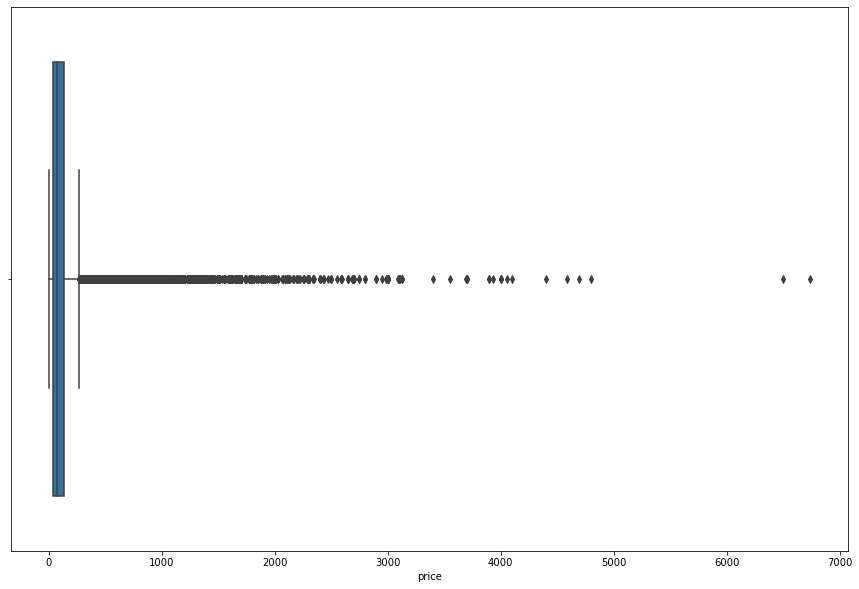

In [53]:
#1. Price
plt.figure(figsize=(15,10))
sns.boxplot(df['price'])
plt.show()

In [54]:
df['price'].skew() 

7.709517327493445

In [55]:
df['price'].var()

32818.71629647399

In [56]:
df['price'].mean()

119.86267743885513

In [57]:
df['price'].median()

74.9

**Inference :**
* The price column is right skewed and having outliers . 
* Skewness is around 7.70 .
* Variance is 32818.7
* Mean is 119.86
* Median is 74.9
* High price products are less purchased so we can remove them in outlier treatment

In [58]:
# OUTLIER TREATMENT 

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR= Q3-Q1
UL = Q3+(1.5*IQR)
UL
#Anything above UL is extreme outlier
LL = Q1-(1.5*IQR)
updated_df = df[(df['price']>LL) & (df['price']<UL)]
updated_df=updated_df.reset_index(drop=True)
updated_df.head()

,Unnamed: 0,product_id,product_category_name_english,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_approved_at,...,order_item_id,seller_id,shipping_limit_date,price,freight_value,payment_value,review_score,seller_city,seller_state,date_difference
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,f8a3e963a310aa58b60a5b1fed5bceb5,b1a1199364a4a7fe27c4486ab63f550d,mogi-guacu,SP,e17e4f88e31525f7deef66779844ddce,delivered,2018-04-24 19:04:19,...,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,18.30,5,sao paulo,SP,2.0
1,1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery,c15eed3881abc9e06763c989679c5094,48d6d950c0aba132537fc335c0c56e01,sao paulo,SP,5fa78e91b5cb84b6a8ccc42733f95742,delivered,2017-12-08 16:33:14,...,1,7040e82f899a04d1b434b795a43b4617,2017-12-14 16:33:14,16.90,7.78,24.68,2,sao paulo,SP,5.0
2,2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery,12a2c614dfc8926e793516b1638c7471,7139ee1d2ad919a82b6e68a29582264e,santana de parnaiba,SP,048cc42e03ca8d43c729adf6962cb348,delivered,2017-11-17 21:35:39,...,1,7040e82f899a04d1b434b795a43b4617,2017-11-23 21:31:31,16.90,7.78,24.68,5,sao paulo,SP,5.0
3,15,8da90b37f0fb171b4877c124f965b1f6,perfumery,98cedac4059f0d6b7427623e3b760ca7,a6c81fc17364794fcac3e9eda345c93a,joao monlevade,MG,4097383021fb2044138f408170bcb379,delivered,2017-11-28 16:35:32,...,1,65b081a070633e057c462abdd6fb9dd8,2017-12-04 16:31:06,137.90,17.41,155.31,5,morrinhos,GO,8.0
4,16,828fe032935d7c1901682e5b6cc076c2,perfumery,afd8a87f50245eae509882b78dfc038c,6fe6e3e376430dc74ce3381053f84e61,rio de janeiro,RJ,37d089b7d517ada3881ba31935310e4f,delivered,2017-08-06 16:50:07,...,1,8931a84a914b3fe9b1ddaa4d704947ca,2017-08-10 16:50:07,99.80,14.45,114.25,5,sao paulo,SP,11.0


In [59]:
updated_df['price'].skew() # The skewness is still >1 

1.0140800271993773

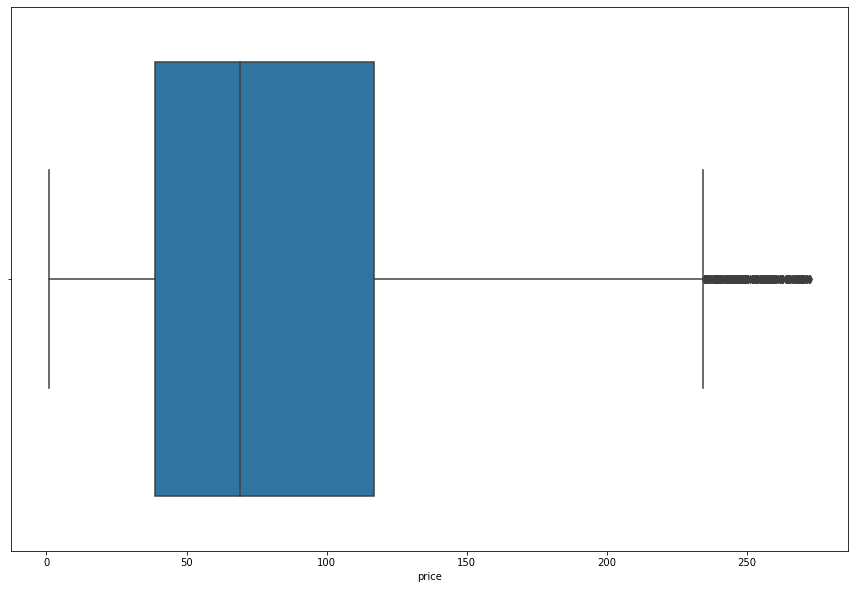

In [60]:
plt.figure(figsize=(15,10))
sns.boxplot(updated_df['price'])
plt.show()

In [61]:
updated_df['Log_Price'] = np.log(updated_df['price'])
updated_df

,Unnamed: 0,product_id,product_category_name_english,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_approved_at,...,seller_id,shipping_limit_date,price,freight_value,payment_value,review_score,seller_city,seller_state,date_difference,Log_Price
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,f8a3e963a310aa58b60a5b1fed5bceb5,b1a1199364a4a7fe27c4486ab63f550d,mogi-guacu,SP,e17e4f88e31525f7deef66779844ddce,delivered,2018-04-24 19:04:19,...,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,18.30,5,sao paulo,SP,2.0,2.389680
1,1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery,c15eed3881abc9e06763c989679c5094,48d6d950c0aba132537fc335c0c56e01,sao paulo,SP,5fa78e91b5cb84b6a8ccc42733f95742,delivered,2017-12-08 16:33:14,...,7040e82f899a04d1b434b795a43b4617,2017-12-14 16:33:14,16.90,7.78,24.68,2,sao paulo,SP,5.0,2.827314
2,2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery,12a2c614dfc8926e793516b1638c7471,7139ee1d2ad919a82b6e68a29582264e,santana de parnaiba,SP,048cc42e03ca8d43c729adf6962cb348,delivered,2017-11-17 21:35:39,...,7040e82f899a04d1b434b795a43b4617,2017-11-23 21:31:31,16.90,7.78,24.68,5,sao paulo,SP,5.0,2.827314
3,15,8da90b37f0fb171b4877c124f965b1f6,perfumery,98cedac4059f0d6b7427623e3b760ca7,a6c81fc17364794fcac3e9eda345c93a,joao monlevade,MG,4097383021fb2044138f408170bcb379,delivered,2017-11-28 16:35:32,...,65b081a070633e057c462abdd6fb9dd8,2017-12-04 16:31:06,137.90,17.41,155.31,5,morrinhos,GO,8.0,4.926529
4,16,828fe032935d7c1901682e5b6cc076c2,perfumery,afd8a87f50245eae509882b78dfc038c,6fe6e3e376430dc74ce3381053f84e61,rio de janeiro,RJ,37d089b7d517ada3881ba31935310e4f,delivered,2017-08-06 16:50:07,...,8931a84a914b3fe9b1ddaa4d704947ca,2017-08-10 16:50:07,99.80,14.45,114.25,5,sao paulo,SP,11.0,4.603168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104719,115604,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicals,63155d2512ff588adce41f3fb43f6a6d,f55304849386dd15f067691bd606d75a,passo fundo,RS,d4e8d3bb5e3673ed68ac154fe86de946,delivered,2017-10-24 11:29:30,...,4e922959ae960d389249c378d1c939f5,2017-11-03 11:29:30,45.00,16.11,61.11,5,jacarei,SP,10.0,3.806662
104720,115605,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicals,bc2ce0dc451a51eccc64691f8f9de54a,17be6cead254c429e33adb6da0cb6352,sao paulo,SP,264f3762919b6ad2a8cae65fd1202106,delivered,2017-11-01 21:05:53,...,4e922959ae960d389249c378d1c939f5,2017-11-13 21:05:23,65.00,9.94,74.94,5,jacarei,SP,9.0,4.174387
104721,115606,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicals,f81bb64a1e672e6cbd0e027046db8533,b8b6643025dbcaa0e516a72f6d0d0717,porto alegre,RS,615ca9b2afeaf5644ae8cef64797132e,delivered,2017-08-08 04:25:31,...,4e922959ae960d389249c378d1c939f5,2017-08-17 04:25:31,45.00,16.11,122.22,5,jacarei,SP,6.0,3.806662
104722,115607,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicals,f81bb64a1e672e6cbd0e027046db8533,b8b6643025dbcaa0e516a72f6d0d0717,porto alegre,RS,615ca9b2afeaf5644ae8cef64797132e,delivered,2017-08-08 04:25:31,...,4e922959ae960d389249c378d1c939f5,2017-08-17 04:25:31,45.00,16.11,122.22,5,jacarei,SP,6.0,3.806662


In [62]:
updated_df['Log_Price'] = np.log(updated_df['price']) 

**Inference:**
* Still the skewnessis not symmetric
* To reduce the skewness further, we can use square root transformation or log transformation and Then we can calculate skewness again

In [63]:
updated_df['Sqrt_Price'] = np.sqrt(updated_df['price'])

In [64]:
updated_df['Sqrt_Price'].skew() 

0.37669259702581326

In [65]:
updated_df['Sqrt_Price'].kurt() 

-0.5891788820520989

**Inference:**
* We see that Sqrt transformation helps bring the skewness down to 0.3 and now the data is fairly symmetrical.
* And the kurtosis value is -0.58 , it is a platykurtic and we can say that there are no ouliers..

## Data Visualization

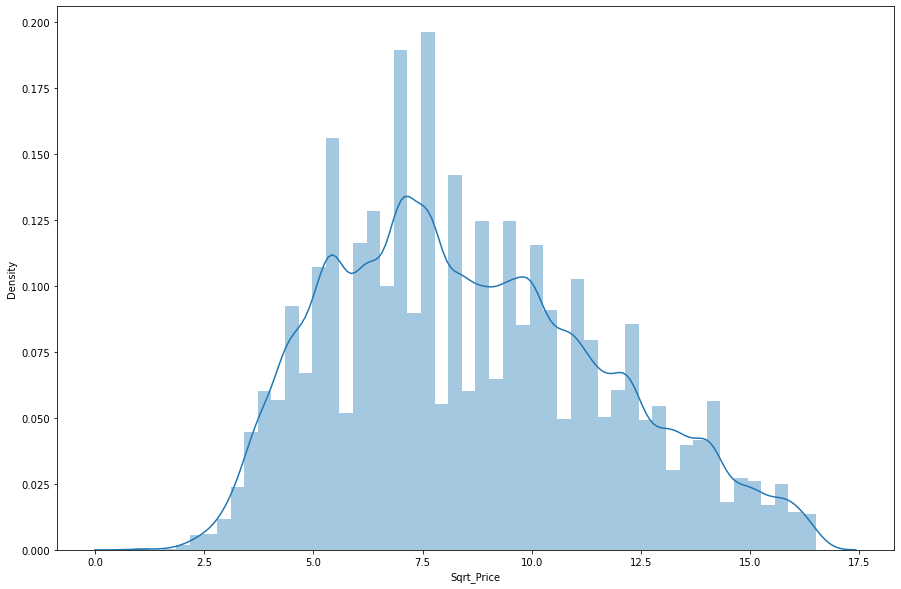

In [66]:
# Visualization of data distribution
plt.figure(figsize=(15,10))
sns.distplot(updated_df['Sqrt_Price'])
plt.show()

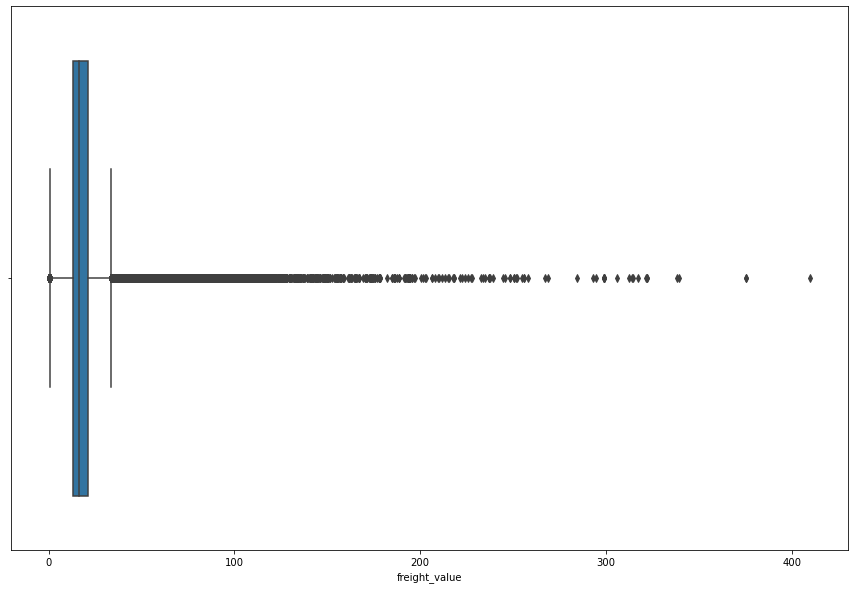

In [67]:
#2.freight_value
plt.figure(figsize=(15,10))
sns.boxplot(df['freight_value'])
plt.show()

In [68]:
df['freight_value'].skew() 

5.587525381497427

In [69]:
df['freight_value'].var()

246.85664358951126

In [70]:
df['freight_value'].mean()

20.002656942949095

In [71]:
df['freight_value'].median()

16.32

**Inference :**
* The freight value column is right skewed and having outliers 
* Skewness is around 5.58.
* Variance is 246.85
* Mean is 20
* Median is 16.32

In [72]:
# OUTLIER TREATMENT 
Q1 = df['freight_value'].quantile(0.25)
Q3 = df['freight_value'].quantile(0.75)
IQR= Q3-Q1
UL = Q3+(1.5*IQR)
UL
#Anything above UL is extreme outlier
LL = Q1-(1.5*IQR)
updated_df = df[(df['freight_value']>LL) & (df['freight_value']<UL)]
updated_df=updated_df.reset_index(drop=True)
updated_df.head()

,Unnamed: 0,product_id,product_category_name_english,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_approved_at,...,order_item_id,seller_id,shipping_limit_date,price,freight_value,payment_value,review_score,seller_city,seller_state,date_difference
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,f8a3e963a310aa58b60a5b1fed5bceb5,b1a1199364a4a7fe27c4486ab63f550d,mogi-guacu,SP,e17e4f88e31525f7deef66779844ddce,delivered,2018-04-24 19:04:19,...,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,18.30,5,sao paulo,SP,2.0
1,1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery,c15eed3881abc9e06763c989679c5094,48d6d950c0aba132537fc335c0c56e01,sao paulo,SP,5fa78e91b5cb84b6a8ccc42733f95742,delivered,2017-12-08 16:33:14,...,1,7040e82f899a04d1b434b795a43b4617,2017-12-14 16:33:14,16.90,7.78,24.68,2,sao paulo,SP,5.0
2,2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery,12a2c614dfc8926e793516b1638c7471,7139ee1d2ad919a82b6e68a29582264e,santana de parnaiba,SP,048cc42e03ca8d43c729adf6962cb348,delivered,2017-11-17 21:35:39,...,1,7040e82f899a04d1b434b795a43b4617,2017-11-23 21:31:31,16.90,7.78,24.68,5,sao paulo,SP,5.0
3,3,0d009643171aee696f4733340bc2fdd0,perfumery,6d699e3ab0fd90fffb3d1379d937de77,0b3dc7efaafb0cf78a4796d42fa8d74c,rio de janeiro,RJ,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,delivered,2017-07-28 09:50:14,...,1,fe2032dab1a61af8794248c8196565c9,2017-08-03 09:50:14,339.00,17.13,356.13,5,campinas,SP,11.0
4,4,0d009643171aee696f4733340bc2fdd0,perfumery,38248f5e3248ffe52b20c510522b04f5,376c9c37aea85ca26315dfe54b3e4c93,diadema,SP,b034b38968b7bc21648e36e05d2eb09f,delivered,2017-08-27 16:25:17,...,1,fe2032dab1a61af8794248c8196565c9,2017-08-31 16:25:17,339.00,11.19,350.19,4,campinas,SP,3.0


In [73]:
updated_df['freight_value'].skew() 

0.45902221737139776

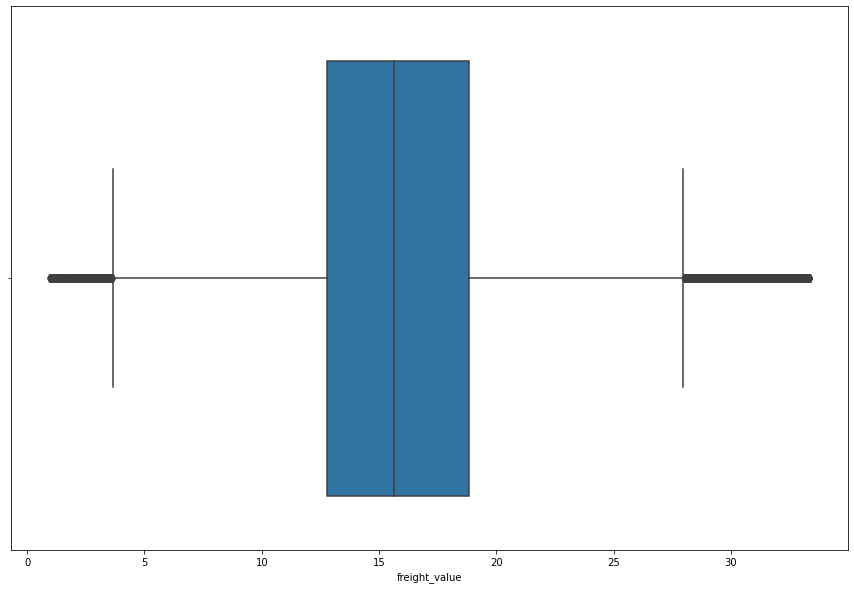

In [74]:
plt.figure(figsize=(15,10))
sns.boxplot(updated_df['freight_value'])
plt.show()

In [75]:
updated_df['freight_value'].kurt() 

0.2324969874149092

**Inference :**
* The skewness is 0.45. We have removed the skewness and it is failry symmentrical.

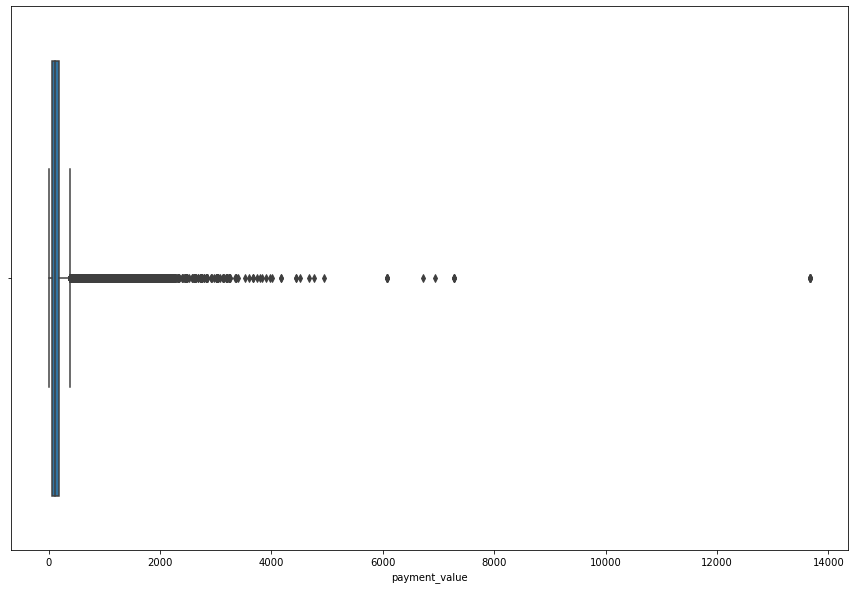

In [76]:
#3 payment_value

plt.figure(figsize=(15,10))
sns.boxplot(df['payment_value'])
plt.show()

In [77]:
df['payment_value'].skew()

14.647736442031096

In [78]:
df['payment_value'].var()

69828.09740429497

In [79]:
df['payment_value'].mean()

171.5737310281419

In [80]:
df['payment_value'].median()

107.97

**Inference :**
* The payment value column is right skewed and having outliers . 
* Skewness is around 14.64.
* Variance is 69828.09
* Mean is 171.5
* Median is 107.97

In [81]:
#OUTLIER TREATMENT
Q1 = df['payment_value'].quantile(0.25)
Q3 = df['payment_value'].quantile(0.75)
IQR= Q3-Q1
UL = Q3+(1.5*IQR)
UL
#Anything above UL is extreme outlier
LL = Q1-(1.5*IQR)
updated_df = df[(df['payment_value']>LL) & (df['payment_value']<UL)]
updated_df=updated_df.reset_index(drop=True)
updated_df.head()

,Unnamed: 0,product_id,product_category_name_english,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_approved_at,...,order_item_id,seller_id,shipping_limit_date,price,freight_value,payment_value,review_score,seller_city,seller_state,date_difference
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,f8a3e963a310aa58b60a5b1fed5bceb5,b1a1199364a4a7fe27c4486ab63f550d,mogi-guacu,SP,e17e4f88e31525f7deef66779844ddce,delivered,2018-04-24 19:04:19,...,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,18.30,5,sao paulo,SP,2.0
1,1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery,c15eed3881abc9e06763c989679c5094,48d6d950c0aba132537fc335c0c56e01,sao paulo,SP,5fa78e91b5cb84b6a8ccc42733f95742,delivered,2017-12-08 16:33:14,...,1,7040e82f899a04d1b434b795a43b4617,2017-12-14 16:33:14,16.90,7.78,24.68,2,sao paulo,SP,5.0
2,2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery,12a2c614dfc8926e793516b1638c7471,7139ee1d2ad919a82b6e68a29582264e,santana de parnaiba,SP,048cc42e03ca8d43c729adf6962cb348,delivered,2017-11-17 21:35:39,...,1,7040e82f899a04d1b434b795a43b4617,2017-11-23 21:31:31,16.90,7.78,24.68,5,sao paulo,SP,5.0
3,3,0d009643171aee696f4733340bc2fdd0,perfumery,6d699e3ab0fd90fffb3d1379d937de77,0b3dc7efaafb0cf78a4796d42fa8d74c,rio de janeiro,RJ,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,delivered,2017-07-28 09:50:14,...,1,fe2032dab1a61af8794248c8196565c9,2017-08-03 09:50:14,339.00,17.13,356.13,5,campinas,SP,11.0
4,4,0d009643171aee696f4733340bc2fdd0,perfumery,38248f5e3248ffe52b20c510522b04f5,376c9c37aea85ca26315dfe54b3e4c93,diadema,SP,b034b38968b7bc21648e36e05d2eb09f,delivered,2017-08-27 16:25:17,...,1,fe2032dab1a61af8794248c8196565c9,2017-08-31 16:25:17,339.00,11.19,350.19,4,campinas,SP,3.0


In [82]:
updated_df['payment_value'].skew() 

1.0436792299485063

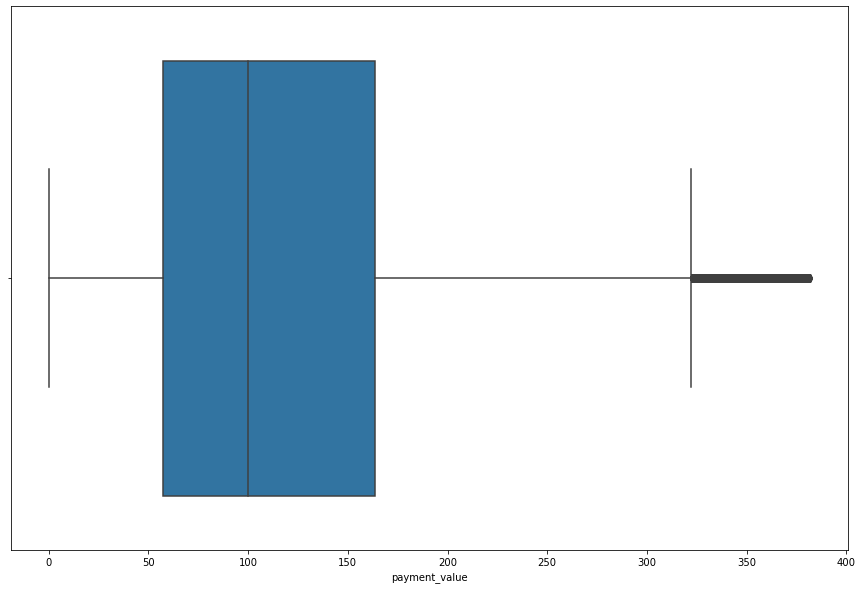

In [83]:
plt.figure(figsize=(15,10))
sns.boxplot(updated_df['payment_value'])
plt.show()

**Inference:**
* Skewness is around 1. So to remove skewness we are using squareroot transformation

In [84]:
updated_df['sqrt_payment'] = np.sqrt(updated_df['payment_value'])
updated_df

,Unnamed: 0,product_id,product_category_name_english,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_approved_at,...,seller_id,shipping_limit_date,price,freight_value,payment_value,review_score,seller_city,seller_state,date_difference,sqrt_payment
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,f8a3e963a310aa58b60a5b1fed5bceb5,b1a1199364a4a7fe27c4486ab63f550d,mogi-guacu,SP,e17e4f88e31525f7deef66779844ddce,delivered,2018-04-24 19:04:19,...,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,18.30,5,sao paulo,SP,2.0,4.277850
1,1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery,c15eed3881abc9e06763c989679c5094,48d6d950c0aba132537fc335c0c56e01,sao paulo,SP,5fa78e91b5cb84b6a8ccc42733f95742,delivered,2017-12-08 16:33:14,...,7040e82f899a04d1b434b795a43b4617,2017-12-14 16:33:14,16.90,7.78,24.68,2,sao paulo,SP,5.0,4.967897
2,2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery,12a2c614dfc8926e793516b1638c7471,7139ee1d2ad919a82b6e68a29582264e,santana de parnaiba,SP,048cc42e03ca8d43c729adf6962cb348,delivered,2017-11-17 21:35:39,...,7040e82f899a04d1b434b795a43b4617,2017-11-23 21:31:31,16.90,7.78,24.68,5,sao paulo,SP,5.0,4.967897
3,3,0d009643171aee696f4733340bc2fdd0,perfumery,6d699e3ab0fd90fffb3d1379d937de77,0b3dc7efaafb0cf78a4796d42fa8d74c,rio de janeiro,RJ,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,delivered,2017-07-28 09:50:14,...,fe2032dab1a61af8794248c8196565c9,2017-08-03 09:50:14,339.00,17.13,356.13,5,campinas,SP,11.0,18.871407
4,4,0d009643171aee696f4733340bc2fdd0,perfumery,38248f5e3248ffe52b20c510522b04f5,376c9c37aea85ca26315dfe54b3e4c93,diadema,SP,b034b38968b7bc21648e36e05d2eb09f,delivered,2017-08-27 16:25:17,...,fe2032dab1a61af8794248c8196565c9,2017-08-31 16:25:17,339.00,11.19,350.19,4,campinas,SP,3.0,18.713364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104103,115604,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicals,63155d2512ff588adce41f3fb43f6a6d,f55304849386dd15f067691bd606d75a,passo fundo,RS,d4e8d3bb5e3673ed68ac154fe86de946,delivered,2017-10-24 11:29:30,...,4e922959ae960d389249c378d1c939f5,2017-11-03 11:29:30,45.00,16.11,61.11,5,jacarei,SP,10.0,7.817289
104104,115605,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicals,bc2ce0dc451a51eccc64691f8f9de54a,17be6cead254c429e33adb6da0cb6352,sao paulo,SP,264f3762919b6ad2a8cae65fd1202106,delivered,2017-11-01 21:05:53,...,4e922959ae960d389249c378d1c939f5,2017-11-13 21:05:23,65.00,9.94,74.94,5,jacarei,SP,9.0,8.656789
104105,115606,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicals,f81bb64a1e672e6cbd0e027046db8533,b8b6643025dbcaa0e516a72f6d0d0717,porto alegre,RS,615ca9b2afeaf5644ae8cef64797132e,delivered,2017-08-08 04:25:31,...,4e922959ae960d389249c378d1c939f5,2017-08-17 04:25:31,45.00,16.11,122.22,5,jacarei,SP,6.0,11.055315
104106,115607,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicals,f81bb64a1e672e6cbd0e027046db8533,b8b6643025dbcaa0e516a72f6d0d0717,porto alegre,RS,615ca9b2afeaf5644ae8cef64797132e,delivered,2017-08-08 04:25:31,...,4e922959ae960d389249c378d1c939f5,2017-08-17 04:25:31,45.00,16.11,122.22,5,jacarei,SP,6.0,11.055315


In [85]:
updated_df['sqrt_payment'].skew()

0.30921385339308854

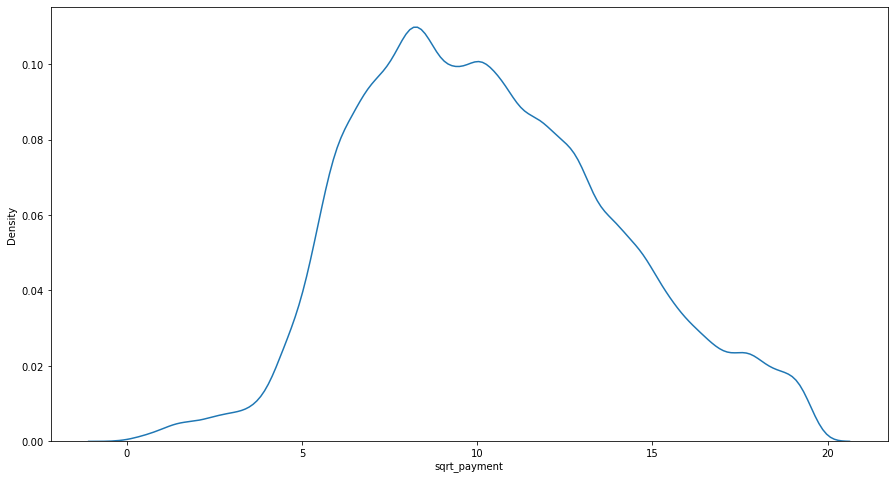

In [86]:
plt.figure(figsize=(15,8))
sns.distplot(updated_df['sqrt_payment'],hist=False)
plt.show()

**Inference:**
* Skewness is reduced to 0.30 and the graph is fairly symmentrical.

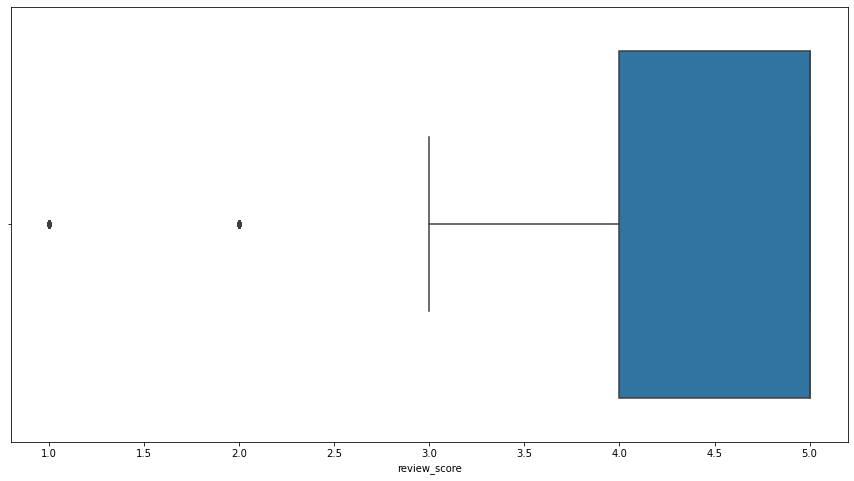

In [87]:
#4 review_score

plt.figure(figsize=(15,8))
sns.boxplot(df['review_score'])
plt.show()

In [88]:
df['review_score'].skew() 

-1.3525687042204835

In [89]:
df['review_score'].mean()

4.082513207413821

In [90]:
df['review_score'].median()

5.0

In [91]:
df['review_score'].var()

1.8115018299996448

**Inference:**
* The mean value for the review score is 4.08 and median is 5 which is the highest .
* So we can infer that most of the products have positive response in terms of review

## Statastical Analysis:

### Building OLS Model

In [92]:
# OLS Model


from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
#check product_categories are impacting on review score

#hypothesis
# alpha = 0.05(95% confidence level)
# H0 : po avg total is same for all products
# H1 : po avg total is not same/different for all products

model = ols('review_score~date_difference ', data=df).fit()

anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
date_difference,1.0,18804.468952,18804.468952,11428.58641,0.0
Residual,113192.0,186244.857691,1.645389,NaN,NaN


**Inference:**
* since pval() < alpha(0.05) ->> date_difference is impacting on review_score

#### Overall Summary of Inferences:

* There are 6 numerical and 16 categerical columns in the Brazillian E-commerce dataset.
*  Using the above dataset we have inferred that:

* Most popular products are  bed_bath_table , health_beauty, sports_leisure , furniture_decor and computers_accessories.
* Least popular products are  security_services, fashion_children_clothes , cds_dvds_musicals , la_cuisine and arts_and_craftsmanship.
* Customers who are purchasing a particular product multiple times and we can say that they are satisfied with the product.
* Customers and the cities who have purchased multiple times.
* Customer state RR , PB, RO, AC and TO have the highest freight value.
* Top 5 customers who have paid highest amount.
* Average days taken to deliver a product is around 11 days .
* Maximum and minimum date difference between order approved and order delivered .
* Order status of the products and found that maximum products are in delivered state . 
* Freight value for the customers - The highest freight value is observed for Customer states like RR and PB . Customer states SP has the lowest freight value between Seller State and Customer State. 
* Transportation cost (freight value) among the  Product categories and found that Home construction has the heighest freight value. 
* Lowest transportation cost is on watches gifts , stationery .
Products and its price .Hence concluded that the products in the category name
* Computers has the highest price and products in the category name home comfort 2 has the lowest price.
* Product and review score: From the graph we came to a conclusion that cds_dvds_musicals has the highest review score and flowers and securityandservices have the least review score  . 
* Relationship between price and review score and found that price does not have any effect on review score from the scatter plot.
* Relationship between price and freight value - There is no significance difference between Freight value and price. 
* Price and payment value are highly correlated.
* Also we analyzed the outliers and performed outlier tretaments in price,freight_value,payment_value. 

* We have done an OLS model of review score and date difference between product order date and product delivery date . We came to a conclusion that it is impacting on review_score.

### Creating Classification model

In [93]:
# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm


from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# import the XGBoost function for classification
from xgboost import XGBClassifier
# import function to perform feature selection
from sklearn.feature_selection import RFE

In [94]:
!pip install xgboost

#### Transformations
###### Tranforming Review score column as Good (if review is greater than 2) - 1 and Bad(review < 2) - 0

In [95]:
# Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [96]:
def new_feature(review):
    if(review>2):
        return 1
    if(review<=2):
        return 0

In [97]:
updated_df['review_new'] = updated_df['review_score'].apply(new_feature)

In [98]:
updated_df['review_new'].value_counts()
# Shows data imbalance

1    89483
0    14625
Name: review_new, dtype: int64

In [99]:
updated_df.head()

,Unnamed: 0,product_id,product_category_name_english,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_approved_at,...,shipping_limit_date,price,freight_value,payment_value,review_score,seller_city,seller_state,date_difference,sqrt_payment,review_new
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,f8a3e963a310aa58b60a5b1fed5bceb5,b1a1199364a4a7fe27c4486ab63f550d,mogi-guacu,SP,e17e4f88e31525f7deef66779844ddce,delivered,2018-04-24 19:04:19,...,2018-04-30 17:33:54,10.91,7.39,18.30,5,sao paulo,SP,2.0,4.277850,1
1,1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery,c15eed3881abc9e06763c989679c5094,48d6d950c0aba132537fc335c0c56e01,sao paulo,SP,5fa78e91b5cb84b6a8ccc42733f95742,delivered,2017-12-08 16:33:14,...,2017-12-14 16:33:14,16.90,7.78,24.68,2,sao paulo,SP,5.0,4.967897,0
2,2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery,12a2c614dfc8926e793516b1638c7471,7139ee1d2ad919a82b6e68a29582264e,santana de parnaiba,SP,048cc42e03ca8d43c729adf6962cb348,delivered,2017-11-17 21:35:39,...,2017-11-23 21:31:31,16.90,7.78,24.68,5,sao paulo,SP,5.0,4.967897,1
3,3,0d009643171aee696f4733340bc2fdd0,perfumery,6d699e3ab0fd90fffb3d1379d937de77,0b3dc7efaafb0cf78a4796d42fa8d74c,rio de janeiro,RJ,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,delivered,2017-07-28 09:50:14,...,2017-08-03 09:50:14,339.00,17.13,356.13,5,campinas,SP,11.0,18.871407,1
4,4,0d009643171aee696f4733340bc2fdd0,perfumery,38248f5e3248ffe52b20c510522b04f5,376c9c37aea85ca26315dfe54b3e4c93,diadema,SP,b034b38968b7bc21648e36e05d2eb09f,delivered,2017-08-27 16:25:17,...,2017-08-31 16:25:17,339.00,11.19,350.19,4,campinas,SP,3.0,18.713364,1


In [100]:
updated_df.columns

Index(['Unnamed: 0', 'product_id', 'product_category_name_english',
       'customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_value',
       'review_score', 'seller_city', 'seller_state', 'date_difference',
       'sqrt_payment', 'review_new'],
      dtype='object')

## Predicting review_score

In [101]:
# Dropping unneccessary variables like  Unnamed: 0,product_id,customer_id,'customer_unique_id,order_id, seller state , customer state

In [102]:
df_feature=updated_df[['product_category_name_english','payment_value','date_difference']]
df_target=updated_df['review_new']

In [103]:
df_feature.head()

,product_category_name_english,payment_value,date_difference
0,perfumery,18.30,2.0
1,perfumery,24.68,5.0
2,perfumery,24.68,5.0
3,perfumery,356.13,11.0
4,perfumery,350.19,3.0


#### Filter numerical and categorical variables.

In [104]:
df_num=df_feature.select_dtypes(include='number')

In [105]:
df_num.columns

Index(['payment_value', 'date_difference'], dtype='object')

In [106]:
df_cat = df_feature.select_dtypes(include = [np.object])

df_cat.columns

Index(['product_category_name_english'], dtype='object')

The logistic regression method fails in presence of categorical variables. To overcome this we use (n-1) dummy encoding. 

**Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.**

In [107]:
# Changing categorical data to continuous 
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

<a id="scale"></a>
## 2.7 Scale the Data 

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [108]:
# Scaling the data
X_scaler = StandardScaler()

num_scaled = X_scaler.fit_transform(df_num)


df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

#### Concatenate scaled numerical and dummy encoded categorical variables.

In [109]:
X = pd.concat([df_num_scaled, dummy_var], axis = 1)
X.isnull().sum()

payment_value                                           0
date_difference                                         0
product_category_name_english_air_conditioning          0
product_category_name_english_art                       0
product_category_name_english_arts_and_craftmanship     0
                                                       ..
product_category_name_english_stationery                0
product_category_name_english_tablets_printing_image    0
product_category_name_english_telephony                 0
product_category_name_english_toys                      0
product_category_name_english_watches_gifts             0
Length: 72, dtype: int64

In [110]:
X.head()

,payment_value,date_difference,product_category_name_english_air_conditioning,product_category_name_english_art,product_category_name_english_arts_and_craftmanship,product_category_name_english_audio,product_category_name_english_auto,product_category_name_english_baby,product_category_name_english_bed_bath_table,product_category_name_english_books_general_interest,...,product_category_name_english_security_and_services,product_category_name_english_signaling_and_security,product_category_name_english_small_appliances,product_category_name_english_small_appliances_home_oven_and_coffee,product_category_name_english_sports_leisure,product_category_name_english_stationery,product_category_name_english_tablets_printing_image,product_category_name_english_telephony,product_category_name_english_toys,product_category_name_english_watches_gifts
0,-1.246919,-1.021364,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.168488,-0.695212,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.168488,-0.695212,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.906108,-0.042910,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.833086,-0.912647,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<a id="split"></a>
## 2.8 Train-Test Split

Before applying various classification techniques to predict the review of customers, let us split the dataset in train and test set.

In [111]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (72875, 73)
y_train (72875,)
X_test (31233, 73)
y_test (31233,)


### Data IMBALANCE - PERFORMING SMOTE

SMOTE (Synthetic Minority Oversampling Technique) is one of the most used techniques to deal with an imbalanced data
It generates the synthetic samples for the minority class 
Python provides a library that provides different techniques to deal with an imbalanced dataset

In [112]:
!pip install imbalanced-learn

In [113]:
#from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification

from imblearn.over_sampling import SMOTE

In [114]:
#sms = SMOTE(random_state=42)
sms=SMOTE(sampling_strategy=0.7,random_state=42)
X_train, y_train = sms.fit_resample(X_train, y_train)

In [115]:
X_train.shape

(106484, 73)

In [116]:
X_train.shape

(106484, 73)

In [117]:
y_train=y_train.to_frame()

In [118]:
y_train['review_new'].value_counts()
# Equal values for both the classes

1    62638
0    43846
Name: review_new, dtype: int64

**Inferences:**

* There was class imbalance in target variable review score .
* Earlier there were 89483 data under class 1 and 14625 under class 0 .
* After performing smote we have increased the minority class 0 containing 43846 data .

### BASE MODEL

### Since the target variable is Review score which is categorical . We are using Logistic Regression . 

<a id="logit"></a>
# 3. Logistic Regression 

In [119]:
# Logistic regression 
logreg = LogisticRegression()
logreg.fit(X_train,y_train)


LogisticRegression()

In [120]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(X_test)
y_pred_prob

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [121]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]   #Since the target variable has two variables 0 or 1.

In [122]:
# Classification report on test data 
acc_table = classification_report(y_test, y_pred)
print(acc_table)

              precision    recall  f1-score   support

           0       0.32      0.39      0.35      4388
           1       0.90      0.86      0.88     26845

    accuracy                           0.80     31233
   macro avg       0.61      0.63      0.62     31233
weighted avg       0.82      0.80      0.81     31233



In [123]:
## Classification report on test data shows 0.69 accuracy . 

In [124]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 1720,  2668],
       [ 3693, 23152]], dtype=int64)

**Compute various performance metrics.**

In [125]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [126]:
precision_logreg = TP / (TP+FP)
precision_logreg

0.8966692486444616

**Precision:** Precision is proportion of positive cases that were correctly predicted

In [127]:
recall_logreg = TP / (TP+FN)
recall_logreg

0.8624324827714658

**Recall:** It is the ratio of true positives to the total actual positive observations. It is also known as, `Sensitivity` or `True Positive Rate`.

In [128]:
#F1 score is a weighted average of Precision and Recall
f1_score_logreg = 2*((precision_logreg*recall_logreg)/(precision_logreg+recall_logreg))
f1_score_logreg

0.8792176967625557

**f1-score:** It is defined as the harmonic mean of precision and recall.

In [129]:
#Accuracy
accuracy_logreg = (TN+TP) / (TN+FP+FN+TP)
accuracy_logreg

0.7963372074408478

**Accuracy:** It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the dataset is imbalanced.

In [130]:
# Specificity is the proportion of actual negative cases that were correctly predicted
specificity_logreg = TN / (TN+FP)
specificity_logreg

0.3919781221513218

**Specificity:** It is the ratio of true negatives to the total actual negative observations.

**Inferences:**
* From confusion matrix we see that accuracy is 0.79 , specificity is 0.39 , recall is 0.87
* F1 score is 0.87 . 

In [131]:
kappa_logreg = cohen_kappa_score(y_test, y_pred)
print('kappa value:',kappa_logreg)

kappa value: 0.2317659734501134


**Interpretation:** As the kappa score for the full model (with cut-off probability 0.5) is 0.6509, we can say that there is `Fair agreement` between the actual and predicted values.

#### Plot the ROC curve.

ROC curve is plotted with the true positive rate (tpr) on the y-axis and false positive rate (fpr) on the x-axis. The area under this curve is used as a measure of separability of the model.

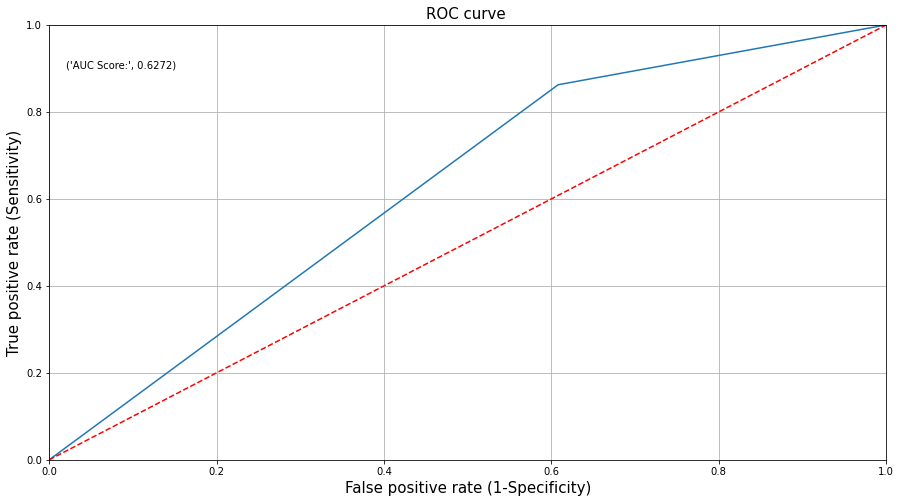

In [132]:
# ROC Curve 

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve ', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', 
            round(metrics.roc_auc_score(y_test, y_pred_prob),4)))

plt.grid(True)

#The red dotted line represents the ROC curve of a purely random classifier; 
# a good classifier stays as far away from that line as possible (toward the top-left corner).

In [133]:
auc_logreg=round(roc_auc_score(y_test, y_pred_prob),4)
auc_logreg

0.6272

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that our classifier (logistic regression) is away from the dotted line; with the AUC score 0.6272

<a id="cut_off"></a>
## 3.1 Performance Measure

**Tabulate the performance measures**

The performance measures that we obtained above, are for the cut_off = 0.5. 

In [134]:
# create dataframe 'score_card'
# columns: specifies the columns to be selected
score_card = pd.DataFrame(columns=['Model_Name', 'Accuracy', 'Precision', 'Recall','F1 score', 'Kappa value','AUC Score'])

# print the score card
score_card

,Model_Name,Accuracy,Precision,Recall,F1 score,Kappa value,AUC Score


In [135]:
# compile the required information
Logisticregression_base = pd.Series({
                     'Model_Name': "Logistic Regression (Base Model)",
                     'Accuracy':accuracy_logreg,
                     'Precision': precision_logreg,
                     'Recall': specificity_logreg,
                     'F1 score': f1_score_logreg,
                     'Kappa value': kappa_logreg,
                     'AUC Score': auc_logreg
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Logisticregression_base, ignore_index=True)

# print the result table
score_card

,Model_Name,Accuracy,Precision,Recall,F1 score,Kappa value,AUC Score
0,Logistic Regression (Base Model),0.796337,0.896669,0.391978,0.879218,0.231766,0.6272


* From the above metrics it shows that it is not a very good model . 

### Recursive Feature Elimination (RFE)

* Recursive Feature Elimination, or RFE for short, is a popular feature selection algorithm.

* RFE is popular because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable.

In [136]:
# consider the independent variables (without the intercept term)

X_train_rfe = X_train.iloc[:,1:]
X_test_rfe = X_test.iloc[:,1:]

logreg = LogisticRegression()

rfe_model = RFE(estimator = logreg, n_features_to_select = 100)

rfe_model = rfe_model.fit(X_train_rfe, y_train)


feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)

signi_feat_rfe = feat_index[feat_index==1].index

print(signi_feat_rfe)

Index(['payment_value', 'date_difference',
       'product_category_name_english_air_conditioning',
       'product_category_name_english_art',
       'product_category_name_english_arts_and_craftmanship',
       'product_category_name_english_audio',
       'product_category_name_english_auto',
       'product_category_name_english_baby',
       'product_category_name_english_bed_bath_table',
       'product_category_name_english_books_general_interest',
       'product_category_name_english_books_imported',
       'product_category_name_english_books_technical',
       'product_category_name_english_cds_dvds_musicals',
       'product_category_name_english_christmas_supplies',
       'product_category_name_english_cine_photo',
       'product_category_name_english_computers',
       'product_category_name_english_computers_accessories',
       'product_category_name_english_consoles_games',
       'product_category_name_english_construction_tools_construction',
       'product_catego

#### Logistic Regression Model 

In [137]:
logreg_rfe = LogisticRegression()
logreg_rfe = sm.Logit(y_train,X_train[['payment_value', 'date_difference']]).fit()


print(logreg_rfe.summary())

Optimization terminated successfully.
         Current function value: 0.642431
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             review_new   No. Observations:               106484
Model:                          Logit   Df Residuals:                   106482
Method:                           MLE   Df Model:                            1
Date:                Wed, 13 Jul 2022   Pseudo R-squ.:                 0.05175
Time:                        18:00:19   Log-Likelihood:                -68409.
converged:                       True   LL-Null:                       -72142.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
payment_value      -0.1418      0.006    -22.337      0.000      -0.154      -0.129
date_differenc

**Inference:**
* pvalue < 0.05(alpha) , This is Significant model 

In [138]:
# let 'y_pred_prob_rfe' be the predicted values of y
y_pred_prob_rfe = logreg_rfe.predict(X_test[[  'payment_value', 'date_difference'   ]])
y_pred_prob_rfe.head()

97313    0.487930
21635    0.409778
72154    0.491446
9126     0.571304
27952    0.342547
dtype: float64

In [139]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_rfe = [ 0 if x < 0.5 else 1 for x in y_pred_prob_rfe]

In [140]:
# print the first five observations of y_pred_rfe
y_pred_rfe[0:5]

[0, 0, 0, 1, 0]

#### Confusion Matrix

In [141]:
cm = confusion_matrix(y_test, y_pred_rfe)
cm

array([[ 2603,  1785],
       [ 9691, 17154]], dtype=int64)

In [142]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy',accuracy)

#Precision is proportion of positive cases that were correctly predicted
precision= TP / (TP+FP)
precision
print('Precision:',precision)

#Recall is the proportion of actual positive cases that were correctly predicted -  True Positive Rate (TPR) or Sensitivity
recall = TP / (TP+FN)
print('Recall:',recall)

#F1 score is a weighted average of Precision and Recall
f1_score = 2*((precision*recall)/(precision+recall))
print('F1 score',f1_score)

# Specificity is the proportion of actual negative cases that were correctly predicted
specificity = TN / (TN+FP)
print('Specificity',specificity)

Accuracy 0.6325681170556783
Precision: 0.9057500396008237
Recall: 0.6390016762898119
F1 score 0.7493447492573826
Specificity 0.5932087511394712


In [143]:
#Classification report
result = classification_report(y_test, y_pred_rfe)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.21      0.59      0.31      4388
           1       0.91      0.64      0.75     26845

    accuracy                           0.63     31233
   macro avg       0.56      0.62      0.53     31233
weighted avg       0.81      0.63      0.69     31233



**Inferences:**
* Classification report shows 0.63 accuracy 

In [144]:
kappa= cohen_kappa_score(y_test, y_pred_rfe)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.1324182668595345


**Inferences:**
* As the kappa score for the model (with cut-off probability 0.5) is  0.13, we can say that there is Slight agreement between the actual and predicted values.

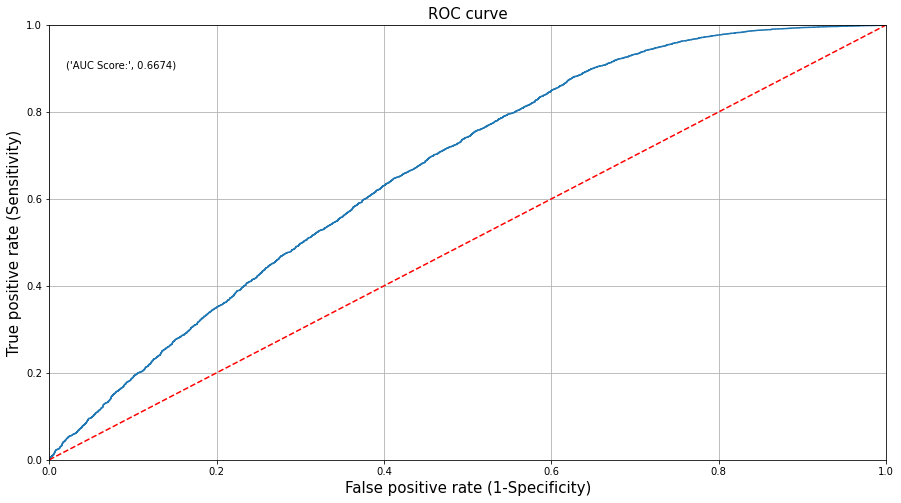

In [145]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rfe)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', 
            round(metrics.roc_auc_score(y_test, y_pred_prob_rfe),4)))

plt.grid(True)

In [146]:
auc=round(roc_auc_score(y_test, y_pred_prob_rfe),4)
print('AUC Score:',auc)

AUC Score: 0.6674


**Inferences:**

* AUC score is 0.66 which is better than Base model but accuracy is 0.63 lesser than base model . 
* This is Not a good model . 

### Tabulate the results

In [147]:
# compile the required information
Rfe_logreg = pd.Series({
                     'Model_Name': "Recursive Feature Elimination (RFE)",
                     'Accuracy':accuracy,
                     'Precision': precision,
                     'Recall': specificity,
                     'F1 score': f1_score,
                     'Kappa value': kappa,
                     'AUC Score': auc
                   })


score_card = score_card.append(Rfe_logreg, ignore_index=True)

# print the result table
score_card

,Model_Name,Accuracy,Precision,Recall,F1 score,Kappa value,AUC Score
0,Logistic Regression (Base Model),0.796337,0.896669,0.391978,0.879218,0.231766,0.6272
1,Recursive Feature Elimination (RFE),0.632568,0.905750,0.593209,0.749345,0.132418,0.6674


**Inferences:**

* Accuracy , F1 score of RFE model has decreased but AUC score has improved . 
* Still we can say that this is not a good model

<a id="rf"></a>
# Random Forest for Classification

It is the method of constructing multiple decision trees on randomly selected data samples. We can use the bootstrap sampling method to select the random samples of the same size from the dataset to construct multiple trees. This method is used for both regression and classification analysis. The random forest returns the prediction based on all the individual decision trees prediction. For regression, it returns the average of all the predicted values; and for classification, it returns the class, which is the mode of all the predicted classes. 

It avoids the over-fitting problem as it considers a random data sample to construct a decision tree. 

In [148]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_model = rf_classification.fit(X_train, y_train)

In [149]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):

    train_pred = model.predict(X_train)

    return(classification_report(y_train, train_pred))

In [150]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
  
    test_pred = model.predict(X_test)

    return(classification_report(y_test, test_pred))

**Calculate performance measures on the train set.**

In [151]:
train_report = get_train_report(rf_model)

# print the performace measures
print(train_report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     43846
           1       0.99      0.98      0.98     62638

    accuracy                           0.98    106484
   macro avg       0.98      0.98      0.98    106484
weighted avg       0.98      0.98      0.98    106484



**Calculate performance measures on the test set.**

In [152]:
test_report = get_test_report(rf_model)

# print the performace measures
print(test_report) 

              precision    recall  f1-score   support

           0       0.38      0.53      0.44      4388
           1       0.92      0.86      0.89     26845

    accuracy                           0.81     31233
   macro avg       0.65      0.69      0.66     31233
weighted avg       0.84      0.81      0.82     31233



In [153]:
y_pred = rf_model.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [154]:
y_pred_rf = [ 0 if x < 0.5 else 1 for x in y_pred]

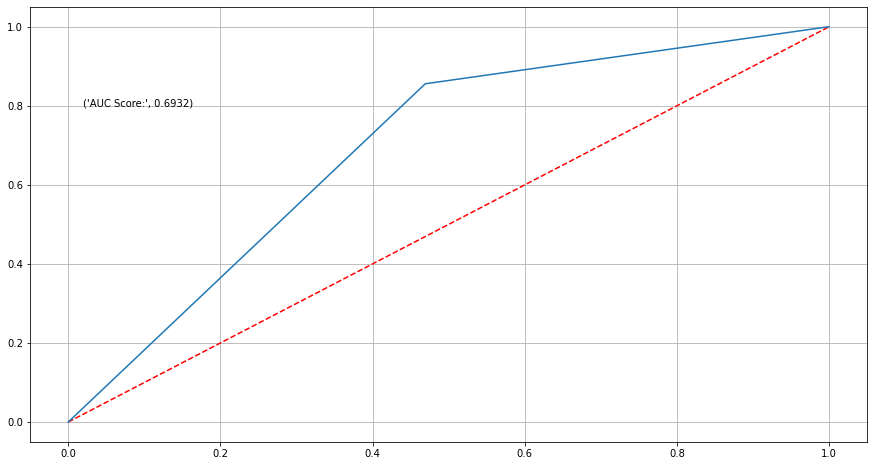

In [155]:
cm = confusion_matrix(y_test, y_pred_rf)
cm
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
plt.plot([0, 1], [0, 1],'r--')
plt.plot(fpr, tpr)
plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_rf),4)))
plt.grid(True)

**Inferences:**
* The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).
* AUC score is 0.6932 which is better than above 2 models ( Base model and RFE) . 

In [156]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy',accuracy)

#Precision is proportion of positive cases that were correctly predicted
precision= TP / (TP+FP)
precision
print('Precision:',precision)

#Recall is the proportion of actual positive cases that were correctly predicted -  True Positive Rate (TPR) or Sensitivity
recall = TP / (TP+FN)
print('Recall:',recall)

#F1 score is a weighted average of Precision and Recall
f1_score = 2*((precision*recall)/(precision+recall))
print('F1 score',f1_score)

# Specificity is the proportion of actual negative cases that were correctly predicted
specificity = TN / (TN+FP)
print('Specificity',specificity)

kappa = cohen_kappa_score(y_test, y_pred)
print('kappa value:',kappa)

auc=round(roc_auc_score(y_test, y_pred_rf),4)
print('AUC Score:',auc)

Accuracy 0.8099766272852432
Precision: 0.9177321400031965
Recall: 0.8556155708698081
F1 score 0.8855859503016983
Specificity 0.5307657247037375
kappa value: 0.3293398048045463
AUC Score: 0.6932


### Tabulate the results

In [157]:
# compile the required information
random_forest = pd.Series({
                     'Model_Name': "Random Forest",
                     'Accuracy':accuracy,
                     'Precision': precision,
                     'Recall': specificity,
                     'F1 score': f1_score,
                     'Kappa value': kappa,
                     'AUC Score': auc
                   })

score_card = score_card.append(random_forest, ignore_index=True)

# print the result table
score_card

,Model_Name,Accuracy,Precision,Recall,F1 score,Kappa value,AUC Score
0,Logistic Regression (Base Model),0.796337,0.896669,0.391978,0.879218,0.231766,0.6272
1,Recursive Feature Elimination (RFE),0.632568,0.905750,0.593209,0.749345,0.132418,0.6674
2,Random Forest,0.809977,0.917732,0.530766,0.885586,0.329340,0.6932


**Inferences:**

* From confusion matrix we see that accuracy is 0.809977 , specificity is 0.53, precision is 0.91
* F1 score is 0.88. 
* As the kappa score for the model  is 0.32, we can say that there is Fair agreement
between the actual and predicted values.
* From these performance metrics we can say that Randomforest is better than above two models . 
* F1 score and accuracy both are higher that other two models. AUC score has also improved . 

### Tune the Hyperparameters using GridSearchCV (Random Forest)

In [158]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     
                     'max_depth': [100, 150, 200]}
                    ]

random_forest_classification = RandomForestClassifier(random_state = 10)

rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

rf_grid_model = rf_grid.fit(X_train, y_train)

print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 100} 



In [159]:
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                        
                        max_depth = rf_grid_model.best_params_.get('max_depth'),
                       
                        random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_model.fit(X_train, y_train)

# print the performance measures for test set for the model with best parameters
print('Classification Report for test set:\n', get_test_report(rf_model))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.41      0.52      0.45      4388
           1       0.92      0.88      0.90     26845

    accuracy                           0.83     31233
   macro avg       0.66      0.70      0.68     31233
weighted avg       0.85      0.83      0.83     31233



In [160]:
y_pred_rf_tuned = [ 0 if x < 0.5 else 1 for x in y_pred]

In [161]:
result = classification_report(y_test, y_pred_rf_tuned)
print(result)

              precision    recall  f1-score   support

           0       0.38      0.53      0.44      4388
           1       0.92      0.86      0.89     26845

    accuracy                           0.81     31233
   macro avg       0.65      0.69      0.66     31233
weighted avg       0.84      0.81      0.82     31233



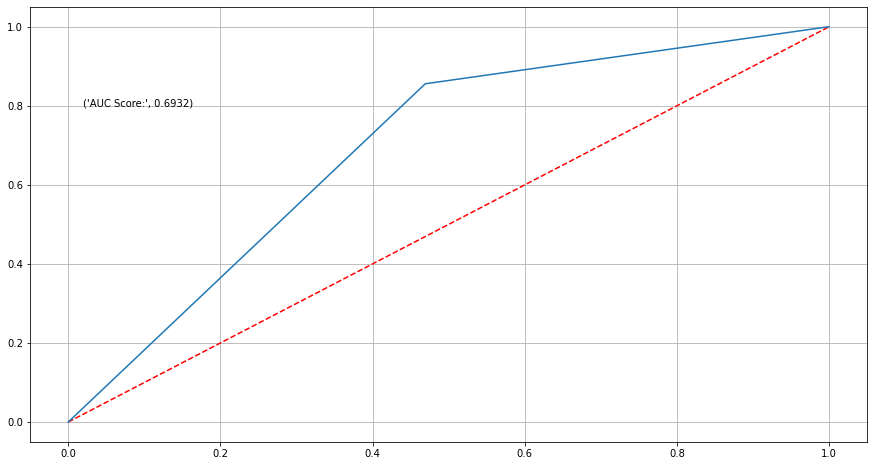

In [162]:
cm = confusion_matrix(y_test, y_pred_rf_tuned)
cm
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_tuned)
plt.plot([0, 1], [0, 1],'r--')
plt.plot(fpr, tpr)
plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_rf_tuned),4)))
plt.grid(True)

In [163]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy',accuracy)

#Precision is proportion of positive cases that were correctly predicted
precision= TP / (TP+FP)
precision
print('Precision:',precision)

#Recall is the proportion of actual positive cases that were correctly predicted -  True Positive Rate (TPR) or Sensitivity
recall = TP / (TP+FN)
print('Recall:',recall)

#F1 score is a weighted average of Precision and Recall
f1_score = 2*((precision*recall)/(precision+recall))
print('F1 score',f1_score)

# Specificity is the proportion of actual negative cases that were correctly predicted
specificity = TN / (TN+FP)
print('Specificity',specificity)

kappa = cohen_kappa_score(y_test, y_pred_rf_tuned)
print('kappa value:',kappa)

auc=round(roc_auc_score(y_test, y_pred_rf_tuned),4)
print('AUC Score:',auc)

Accuracy 0.8099766272852432
Precision: 0.9177321400031965
Recall: 0.8556155708698081
F1 score 0.8855859503016983
Specificity 0.5307657247037375
kappa value: 0.3293398048045463
AUC Score: 0.6932


### Tabulate the results

In [164]:
# compile the required information
random_forest = pd.Series({
                     'Model_Name': "Random Forest with tuned parameter (GridSearchCV)",
                     'Accuracy':accuracy,
                     'Precision': precision,
                     'Recall': specificity,
                     'F1 score': f1_score,
                     'Kappa value': kappa,
                     'AUC Score': auc
                   })


score_card = score_card.append(random_forest, ignore_index=True)

# print the result table
score_card

,Model_Name,Accuracy,Precision,Recall,F1 score,Kappa value,AUC Score
0,Logistic Regression (Base Model),0.796337,0.896669,0.391978,0.879218,0.231766,0.6272
1,Recursive Feature Elimination (RFE),0.632568,0.905750,0.593209,0.749345,0.132418,0.6674
2,Random Forest,0.809977,0.917732,0.530766,0.885586,0.329340,0.6932
3,Random Forest with tuned parameter (GridSearchCV),0.809977,0.917732,0.530766,0.885586,0.329340,0.6932


**Inferences:**
* There was no change after tuning parameters for random forest

## ADABoost

Let us build the AdaBoost classifier with decision trees. The model creates several stumps (decision tree with only a single decision node and two leaf nodes) on the train set and predicts the class based on these weak learners (stumps). For the first model, it assigns equal weights to each sample. It assigns the higher weight for the wrongly predicted samples and lower weight for the correctly predicted samples. This method continues till all the observations are correctly classified or the predefined number of stumps is created.

In [165]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

#### Build an Adaboost model on a training dataset.

In [166]:
train_report = get_train_report(ada_model)

# print the performace measures
print(train_report)

              precision    recall  f1-score   support

           0       0.77      0.33      0.46     43846
           1       0.66      0.93      0.77     62638

    accuracy                           0.68    106484
   macro avg       0.71      0.63      0.62    106484
weighted avg       0.71      0.68      0.64    106484



#### Build an Adaboost model on a test dataset.

In [167]:
test_report = get_test_report(ada_model)

# print the performace measures
print(test_report) 

              precision    recall  f1-score   support

           0       0.42      0.31      0.35      4388
           1       0.89      0.93      0.91     26845

    accuracy                           0.84     31233
   macro avg       0.65      0.62      0.63     31233
weighted avg       0.82      0.84      0.83     31233



In [168]:
y_pred = ada_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 1343,  3045],
       [ 1893, 24952]], dtype=int64)

In [169]:
 ada_model.predict_proba(X_test)

array([[0.49759346, 0.50240654],
       [0.49759346, 0.50240654],
       [0.49609213, 0.50390787],
       ...,
       [0.49347048, 0.50652952],
       [0.49512346, 0.50487654],
       [0.49302626, 0.50697374]])

**Calculate performance measures on the test set.**

In [170]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy',accuracy)

#Precision is proportion of positive cases that were correctly predicted
precision= TP / (TP+FP)
precision
print('Precision:',precision)

#Recall is the proportion of actual positive cases that were correctly predicted -  True Positive Rate (TPR) or Sensitivity
recall = TP / (TP+FN)
print('Recall:',recall)

#F1 score is a weighted average of Precision and Recall
f1_score = 2*((precision*recall)/(precision+recall))
print('F1 score',f1_score)
# Specificity is the proportion of actual negative cases that were correctly predicted
specificity = TN / (TN+FP)
print('Specificity',specificity)

kappa = cohen_kappa_score(y_test, y_pred)
print('kappa value:',kappa)

Accuracy 0.8418979925079243
Precision: 0.8912383469657463
Recall: 0.9294840752467871
F1 score 0.9099595200758543
Specificity 0.3060619872379216
kappa value: 0.2646021822413651


#### Plot the ROC curve.

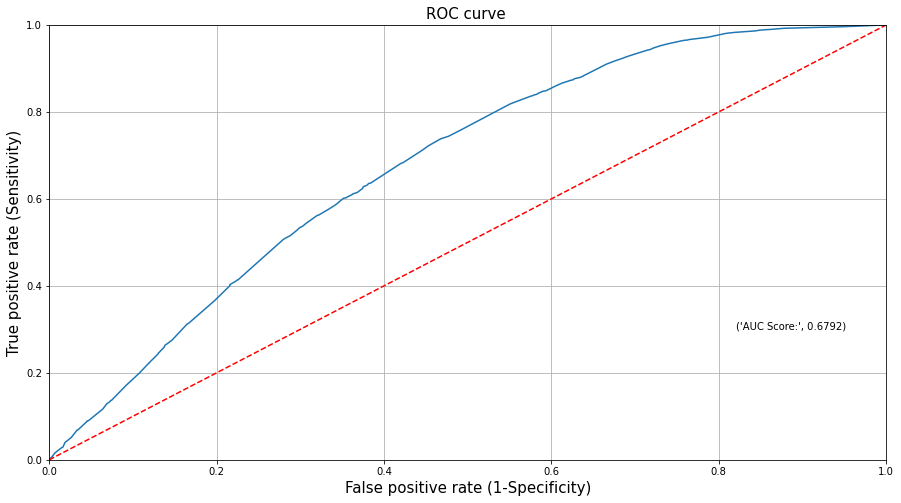

In [171]:
# ROC CURVE
y_pred_prob = ada_model.predict_proba(X_test)[:,1]
    
    
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    
plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve ', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

plt.grid(True)

In [172]:
auc=round(roc_auc_score(y_test, y_pred_prob),4)
print('AUC Score:',auc)

AUC Score: 0.6792


### Tabulate the results

In [173]:
# compile the required information
adaboost = pd.Series({
                     'Model_Name': "Adaboost",
                     'Accuracy':accuracy,
                     'Precision': precision,
                     'Recall': specificity,
                     'F1 score': f1_score,
                     'Kappa value': kappa,
                     'AUC Score': auc
                   })


score_card = score_card.append(adaboost, ignore_index=True)

# print the result table
score_card

,Model_Name,Accuracy,Precision,Recall,F1 score,Kappa value,AUC Score
0,Logistic Regression (Base Model),0.796337,0.896669,0.391978,0.879218,0.231766,0.6272
1,Recursive Feature Elimination (RFE),0.632568,0.905750,0.593209,0.749345,0.132418,0.6674
2,Random Forest,0.809977,0.917732,0.530766,0.885586,0.329340,0.6932
3,Random Forest with tuned parameter (GridSearchCV),0.809977,0.917732,0.530766,0.885586,0.329340,0.6932
4,Adaboost,0.841898,0.891238,0.306062,0.909960,0.264602,0.6792


**Inferences:**

* The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).
* From the above plot, we can see that the AdaBoost model is away from the dotted line; with the AUC score 0.6792.
* AUC Score is lower than AUC score of random forest .F1 score  , prescision recall are also lower in Adaboost as compared to Random forest.
* Accuracy is 0.84 which is greater than Random Forest . 

In [604]:
# Better performance of random forest than Adaboost. 

## Gradient Boosting

This method optimizes the differentiable loss function by building the number of weak learners (decision trees) sequentially. It considers the residuals from the previous model and fits the next model to the residuals. The algorithm uses a gradient descent method to minimize the error.

In [174]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

**Calculate performance measures on the train set.**

In [175]:
train_report = get_train_report(gboost_model)

# print the performace measures
print(train_report)

              precision    recall  f1-score   support

           0       0.95      0.70      0.81     43846
           1       0.82      0.97      0.89     62638

    accuracy                           0.86    106484
   macro avg       0.89      0.84      0.85    106484
weighted avg       0.88      0.86      0.86    106484



**Calculate performance measures on the test set.**

In [176]:
# Test performance
test_report = get_test_report(gboost_model)

# print the performace measures
print(test_report) 

              precision    recall  f1-score   support

           0       0.54      0.32      0.40      4388
           1       0.90      0.95      0.92     26845

    accuracy                           0.87     31233
   macro avg       0.72      0.64      0.66     31233
weighted avg       0.85      0.87      0.85     31233



**Interpretation:** The classification report shows that the model is 87% accurate.

In [177]:
# Confusion Matrix
y_pred = gboost_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 1421,  2967],
       [ 1214, 25631]], dtype=int64)

In [178]:
#Performance Metrics 

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy',accuracy)

#Precision is proportion of positive cases that were correctly predicted
precision= TP / (TP+FP)
precision
print('Precision:',precision)

#Recall is the proportion of actual positive cases that were correctly predicted -  True Positive Rate (TPR) or Sensitivity
recall = TP / (TP+FN)
print('Recall:',recall)

#F1 score is a weighted average of Precision and Recall
f1_score = 2*((precision*recall)/(precision+recall))
print('F1 score',f1_score)

# Specificity is the proportion of actual negative cases that were correctly predicted
specificity = TN / (TN+FP)
print('Specificity',specificity)

kappa = cohen_kappa_score(y_test, y_pred)
print('kappa value:',kappa)

Accuracy 0.8661351775365799
Precision: 0.8962514861179104
Recall: 0.9547774259638666
F1 score 0.9245892177551719
Specificity 0.3238377392889699
kappa value: 0.33451170920726403


#### Plot the ROC curve.

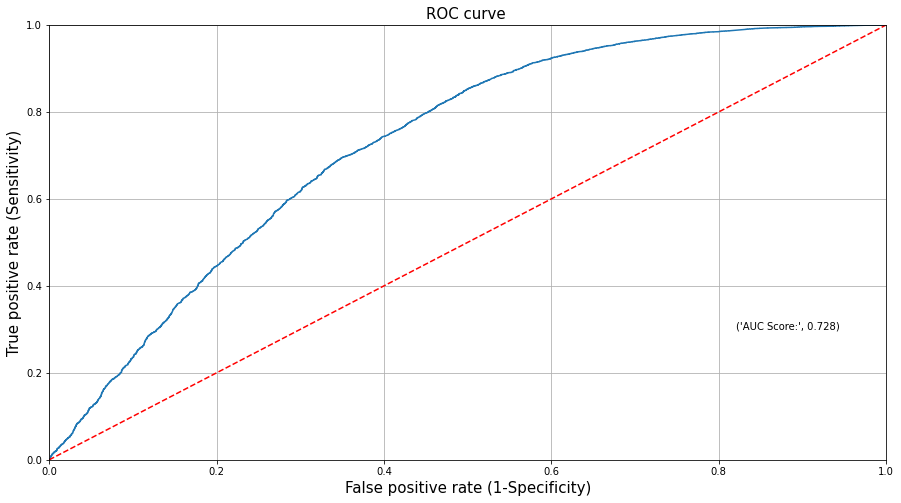

In [179]:
# ROC CURVE
y_pred_prob = gboost_model.predict_proba(X_test)[:,1]
    
    
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    
plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve ', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

plt.grid(True)

In [180]:
auc=round(roc_auc_score(y_test, y_pred_prob),4)
print('AUC Score:',auc)

AUC Score: 0.728


**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that the gradient boosting model is away from the dotted line; with the AUC score 0.7280.

### Tabulate the results

In [181]:
# compile the required information
gboost = pd.Series({
                     'Model_Name': "Gradient Boosting",
                     'Accuracy':accuracy,
                     'Precision': precision,
                     'Recall': specificity,
                     'F1 score': f1_score,
                     'Kappa value': kappa,
                     'AUC Score': auc
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(gboost, ignore_index=True)

# print the result table
score_card

,Model_Name,Accuracy,Precision,Recall,F1 score,Kappa value,AUC Score
0,Logistic Regression (Base Model),0.796337,0.896669,0.391978,0.879218,0.231766,0.6272
1,Recursive Feature Elimination (RFE),0.632568,0.905750,0.593209,0.749345,0.132418,0.6674
2,Random Forest,0.809977,0.917732,0.530766,0.885586,0.329340,0.6932
3,Random Forest with tuned parameter (GridSearchCV),0.809977,0.917732,0.530766,0.885586,0.329340,0.6932
4,Adaboost,0.841898,0.891238,0.306062,0.909960,0.264602,0.6792
5,Gradient Boosting,0.866135,0.896251,0.323838,0.924589,0.334512,0.7280


**Inferences:**
* All the metrics of gradient boost Algorith have improved .
* This Shows a good model is built.

### XG BOOST

XGBoost (extreme gradient boost) is an alternative form of gradient boosting method. This method generally considers the initial prediction as 0.5 and build the decision tree to predict the residuals. It considers the regularization parameter to avoid overfitting.
Execution speed - It is way faster when compared to other boosting implementations.
Model performance - It is the top performing algorithm for structured datasets .

In [182]:
X_train.shape

(106484, 73)

In [183]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

#### Build an XGBoost model on a training dataset.

In [184]:
# Train performance
train_report = get_train_report(xgb_model)

# print the performace measures
print(train_report)

              precision    recall  f1-score   support

           0       0.94      0.72      0.81     43846
           1       0.83      0.97      0.89     62638

    accuracy                           0.86    106484
   macro avg       0.88      0.84      0.85    106484
weighted avg       0.87      0.86      0.86    106484



**Interpretation:** The above output shows that the f1-score and accuracy of the model is 0.85 and 0.86

#### Build an XGBoost model on a test dataset.

In [185]:
# Test performance
test_report = get_test_report(xgb_model)

# print the performace measures
print(test_report) 

              precision    recall  f1-score   support

           0       0.51      0.32      0.40      4388
           1       0.90      0.95      0.92     26845

    accuracy                           0.86     31233
   macro avg       0.70      0.64      0.66     31233
weighted avg       0.84      0.86      0.85     31233



In [186]:
y_pred = xgb_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 1424,  2964],
       [ 1366, 25479]], dtype=int64)

In [187]:
xgb_model.predict_proba(X_test)

array([[0.360798  , 0.639202  ],
       [0.04373205, 0.95626795],
       [0.22973633, 0.7702637 ],
       ...,
       [0.11016083, 0.8898392 ],
       [0.18483996, 0.81516004],
       [0.10156882, 0.8984312 ]], dtype=float32)

In [188]:
#Performance Metrics 

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy',accuracy)

#Precision is proportion of positive cases that were correctly predicted
precision= TP / (TP+FP)
precision
print('Precision:',precision)

#Recall is the proportion of actual positive cases that were correctly predicted -  True Positive Rate (TPR) or Sensitivity
recall = TP / (TP+FN)
print('Recall:',recall)

#F1 score is a weighted average of Precision and Recall
f1_score = 2*((precision*recall)/(precision+recall))
print('F1 score',f1_score)

# Specificity is the proportion of actual negative cases that were correctly predicted
specificity = TN / (TN+FP)
print('Specificity',specificity)

kappa = cohen_kappa_score(y_test, y_pred)
print('kappa value:',kappa)

Accuracy 0.861364582332789
Precision: 0.8957915831663327
Recall: 0.9491152914881729
F1 score 0.9216828244827087
Specificity 0.3245214220601641
kappa value: 0.3228081615445677


#### Plot the ROC curve.

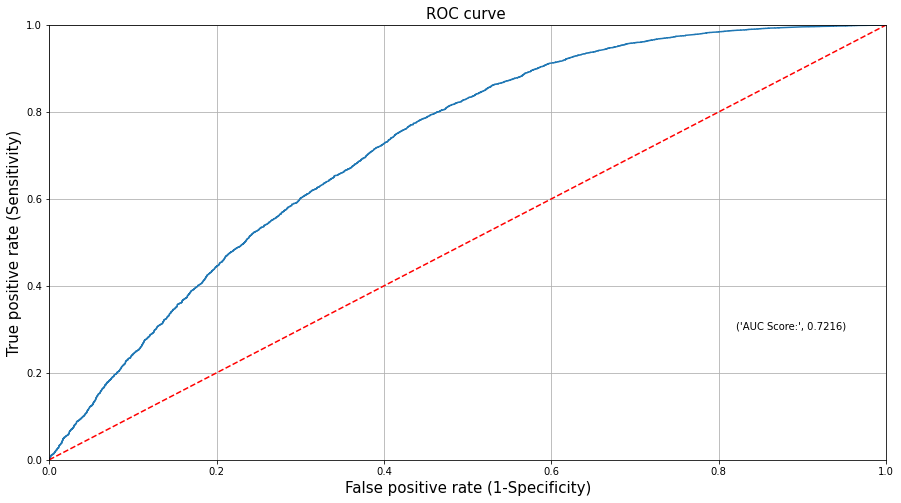

In [189]:
# ROC CURVE
y_pred_prob = xgb_model.predict_proba(X_test)[:,1]
    
    
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    
plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve ', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

plt.grid(True)

In [190]:
auc=round(roc_auc_score(y_test, y_pred_prob),4)
print('AUC Score:',auc)

AUC Score: 0.7216


**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that the XGBoost model is away from the dotted line; with the AUC score 0.7216.

### Tabulate the results

In [191]:
# compile the required information
xgboost = pd.Series({
                     'Model_Name': "XGBoost",
                     'Accuracy':accuracy,
                     'Precision': precision,
                     'Recall': specificity,
                     'F1 score': f1_score,
                     'Kappa value': kappa,
                     'AUC Score': auc
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(xgboost, ignore_index=True)

# print the result table
score_card

,Model_Name,Accuracy,Precision,Recall,F1 score,Kappa value,AUC Score
0,Logistic Regression (Base Model),0.796337,0.896669,0.391978,0.879218,0.231766,0.6272
1,Recursive Feature Elimination (RFE),0.632568,0.905750,0.593209,0.749345,0.132418,0.6674
2,Random Forest,0.809977,0.917732,0.530766,0.885586,0.329340,0.6932
3,Random Forest with tuned parameter (GridSearchCV),0.809977,0.917732,0.530766,0.885586,0.329340,0.6932
4,Adaboost,0.841898,0.891238,0.306062,0.909960,0.264602,0.6792
5,Gradient Boosting,0.866135,0.896251,0.323838,0.924589,0.334512,0.7280
6,XGBoost,0.861365,0.895792,0.324521,0.921683,0.322808,0.7216


**Inferences:**
* The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).
* From the above plot, we can see that the XGBoost model is away from the dotted line; with the AUC score 0.7216.
* Accuracy is 0.86135 which is good. Also from preformance metrics from train and test data we can say that there is no overfitting . 
* F1 score 0.92,  precision 0.89, recall 0.324 are also high . 

* The performance metrics of XGBoost show good results. 

<a id="tune"></a>
### XGBOOST Tune the Hyperparameters (GridSearchCV)

Let us tune the hyperparameters to obtain the optimal values for the XGBoost model.

In [192]:
tuning_parameters = {'learning_rate': [0.5, 0.10,0.20,0.25,0.30],
                     
                     'gamma': [0.1, 0.2, 0.3, 0.4, 0.5]}

# instantiate the 'XGBClassifier' 
xgb_model = XGBClassifier()

xgb_grid = GridSearchCV(estimator = xgb_model,
            param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
xgb_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 0.2, 'learning_rate': 0.5} 



In [193]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               
                              gamma = xgb_grid.best_params_.get('gamma'))

xgb_model_grid = xgb_grid_model.fit(X_train, y_train)

In [194]:
y_pred = xgb_model_grid.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 1260,  3128],
       [ 1198, 25647]], dtype=int64)

#### Build the model using the tuned hyperparameters.

In [195]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.29      0.37      4388
           1       0.89      0.96      0.92     26845

    accuracy                           0.86     31233
   macro avg       0.70      0.62      0.65     31233
weighted avg       0.84      0.86      0.84     31233



**Interpretation:** The above output shows that the f1-score and accuracy of the model is 0.84.

In [196]:
#Performance Metrics 

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy',accuracy)

#Precision is proportion of positive cases that were correctly predicted
precision= TP / (TP+FP)
precision
print('Precision:',precision)

#Recall is the proportion of actual positive cases that were correctly predicted -  True Positive Rate (TPR) or Sensitivity
recall = TP / (TP+FN)
print('Recall:',recall)

#F1 score is a weighted average of Precision and Recall
f1_score = 2*((precision*recall)/(precision+recall))
print('F1 score',f1_score)

# Specificity is the proportion of actual negative cases that were correctly predicted
specificity = TN / (TN+FP)
print('Specificity',specificity)

kappa = cohen_kappa_score(y_test, y_pred)
print('kappa value:',kappa)

Accuracy 0.8614926520026894
Precision: 0.8912945264986968
Recall: 0.9553734401192028
F1 score 0.9222222222222222
Specificity 0.2871467639015497
kappa value: 0.2971955172260077


#### Plot the ROC curve.

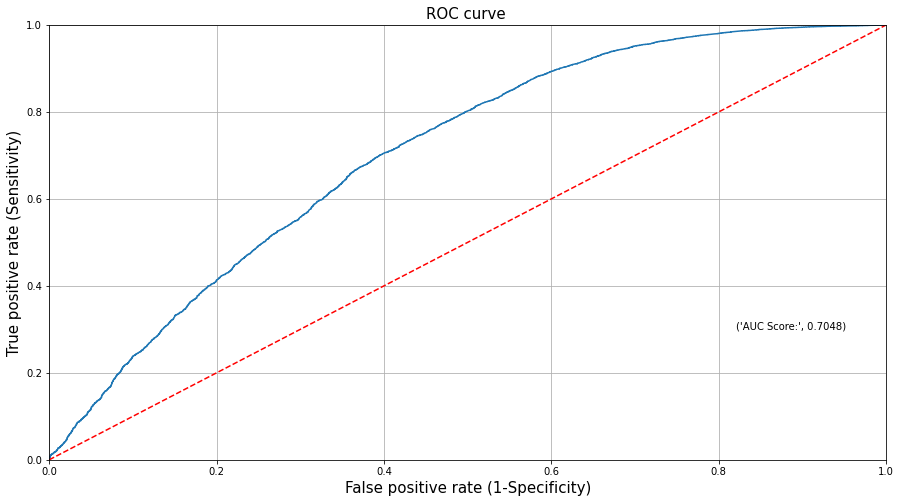

In [197]:
# ROC CURVE
y_pred_prob = xgb_model_grid.predict_proba(X_test)[:,1]
    
    
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    
plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve ', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',
                    round(roc_auc_score(y_test, y_pred_prob),4)))

plt.grid(True)

In [198]:
auc=round(roc_auc_score(y_test, y_pred_prob),4)
print('AUC Score:',auc)

AUC Score: 0.7048


**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that the XGBoost model (GridSearchCV) is away from the dotted line; with the AUC score 0.7048.

In [199]:
# compile the required information
xgboost = pd.Series({
                     'Model_Name': "XGBoost with tuned parameter using Gridsearchcv",
                     'Accuracy':accuracy,
                     'Precision': precision,
                     'Recall': specificity,
                     'F1 score': f1_score,
                     'Kappa value': kappa,
                     'AUC Score': auc
                   })

score_card = score_card.append(xgboost, ignore_index=True)

# print the result table
score_card

,Model_Name,Accuracy,Precision,Recall,F1 score,Kappa value,AUC Score
0,Logistic Regression (Base Model),0.796337,0.896669,0.391978,0.879218,0.231766,0.6272
1,Recursive Feature Elimination (RFE),0.632568,0.905750,0.593209,0.749345,0.132418,0.6674
2,Random Forest,0.809977,0.917732,0.530766,0.885586,0.329340,0.6932
3,Random Forest with tuned parameter (GridSearchCV),0.809977,0.917732,0.530766,0.885586,0.329340,0.6932
4,Adaboost,0.841898,0.891238,0.306062,0.909960,0.264602,0.6792
5,Gradient Boosting,0.866135,0.896251,0.323838,0.924589,0.334512,0.7280
6,XGBoost,0.861365,0.895792,0.324521,0.921683,0.322808,0.7216
7,XGBoost with tuned parameter using Gridsearchcv,0.861493,0.891295,0.287147,0.922222,0.297196,0.7048


## General Inferences

### Inferences from data preprocessing:
    
* Average days taken to deliver a product is around 11 days .
* Order status of the products and found that maximum products are in delivered state .
* Lowest transportation cost is on watches gifts , stationery .
* Product and review score: From the graph we came to a conclusion that cds_dvds_musicals has the highest review score and   flowers and securityandservices have the least review score  . 
* Relationship between price and review score and found that price does not have any effect on review score from the       scatter plot.

### Inferences from Model Building:
* We have upsampled the minority class using SMOTE upto 70% to overcome data imbalance in the target variable .  
* As p value for payment  and date difference is < 0.05 . We can say that logistic regression is a significant model.
* From the RFE model we can say that date difference and payment value are first two import major features.
* From random forest algorithm we can see that there is a slight overfitting but we can say that from adaboost  gradient     boosting , xgboost that there is no overfitting. 
* As compared to all the models , Gradient boosting is the better one. 

## Results

From all the performance metrics we can infer that Gradient boost is the best model compared to to other models having accuracy 0.866,
precision 0.896251, recall 0.323838 F1 score 0.924589 kappa value 0.334512 and AUC Score 0.7280